<font size="5">**keras/TensorFlow nel rischio finanziario**

***Rischio di credito (german credit) e rischio di mercato***

> (c) 2026 Antonio Piemontese<br>
> Adattamento di [questo notebook ufficiale di Google](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=it).

# Passi preliminari

## Reset output

E' prudente, come passo 0 di tutti i notebook appena aperti, **cancellare gli eventuali output delle celle, sia di codice che markdown** (relative ad esecuzioni precedenti), perchè possono risultare fuorvianti e non attuali, in questo modo (da menù in alto di Google Colab): `Modifica (Edit)` --> `Cancella tutti gli outputs (Clear all output)` al fondo.

👉 La cella seguente è una cella TECNICA (indipendente dal tema TensorFlow qui trattato) per poter inserire facilmente immagini nel notebook (pre-caricate in `content`)

## Legenda delle icone
La lista delle icone (standard) usate nel notebook:<br>

👉 punto di attenzione, il "succo"<br>
📌 nota<br>
📦 punto elenco importante<br>
📊 dati/numeri<br>
🔹 punto elenco normale<br>
⭐ punto elenco importante<br>
✅ punto risolto, positivo<br>
❌ punto negativo, da evitare<br>
⚠️ attenzione, warning, allarme

## La rilevazione dell'ambiente
**Il presente notebook funziona sia in Jupyter Notebook che VSC che Google Colab**.
A questo scopo, per garantire la compatibilità di alcune celle di codice con entrambi gli ambienti indicati, **rileviamo l'ambiente di esecuzione del notebook** (Jupyter/VSC oppure Google Colab): la seguente cella imposta una **variabile booleana `IN_COLAB`** che sarà poi **testata** da alcune celle del notebook (in particolare quelle di visualizzazione di immagini e PDF) per personalizzarne il comportamento a seconda dell'ambiente di esecuzione dell'ambiente rilevato.

In [104]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
                                             # Imports the Google Colab module, which provides Colab-specific functionality
                                             # for the notebook environment.
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Running on Colab:", IN_COLAB)


# IMPORT dei package necessari (necessari sia in JN, VSC che in Colab):
from IPython.display import Image, display   # import dei package di incorporamento e visualizzazione immagine (una tantum)
                                             # Image e display sono entrambi necessari a Jupyter Notebook
                                             # Google Colab utilizza solo Image
import os                                    # necessario a Google Colab per vedere da una cella codice
                                             # i contenuti del 'content'

Running on Colab: True


## Il caricamento dei package

In [146]:
import pandas as pd                                                   # gestione dataframe
import numpy as np                                                    # gestione array numeriche

from sklearn.metrics import confusion_matrix, classification_report   # valutazione prestazioni predittive
import seaborn as sns                                                 # il package di grafica 'seaborn'
import matplotlib.pyplot as plt                                       # il package di grafica 'matplotlib'


## Il caricamento delle immagini

In [105]:
# comando solo per Google Colab
if IN_COLAB:
    print(os.listdir('/content'))      # la print è necessaria, altrimenti NON visualizza nulla.
                                       # la funzione 'os.listdir()' infatti restituisce una lista, che poi occorre
                                       # assegnare ad una variabile o passare ad una funzione!

['.config', 'overfit_vs_underfit.png', 'sigmoide.png', 'batch.png', 'iterazioni.png', 'loss_function_2.png', 'funzioni_attivazione.png', 'Softmax_ita.mp4', 'architettura_mnist_keras.png', 'bias_vs_varianza.png', 'data_leakage_safeness.png', 'keras_tf_support.png', 'bias_varianza_tradeoff.png', 'softmax.png', 'rete_MLP.png', 'varie_MLP.png', 'Discesa_Gradiente (1).pdf', 'loss_function.png', 'mnist_dataset.png', 'ranks.png', 'Discesa_Gradiente.pdf', 'RMSE.png', 'rete_MLP_2.png', 'backpropagation.png', 'MLP_con_backpropagation.png', 'rete_MLP_3.png', 'sample_data']


Per garantire che i vari notebook funzionino correttamente sia in Colab che JN, le celle di visualizzazione delle immagini
useranno un codice one-liner di questo tipo:<br>
```text
    Image('/content/nome-immagine.png', width=500) if IN_COLAB else display(Image(filename='nome-immagine.png'))
```
Con Jupyter Notebook le immagini devono trovarsi nella stessa cartella del notebook (il path è infatti relativo).<br>
Con Google Colab devono essere caricate nella directory content dello storage volatile della sessione.<br>


**Lista delle immagini *png* necessarie a questo notebook**:
* `ranks.png`
* `keras_tf_support.png`
* `mnist_dataset.png`
* `data_leakage_safeness.png`
* `rete_MLP.png`
* `rete_MLP_2.png`
* `softmax.png`
* `loss_function_2.png`
* `MLP_con_backpropagation.png`
* `backpropagation.png`
* `iterazioni.png`
* `batch.png`

* `bias_vs_varianza.png`
* `bias_varianza_tradeoff.png`
* `overfit_vs_underfit.png`
* `loss_function.png`
* `RMSE.png`
* `sigmoide.png`
* `funzioni_attivazione.png`


* `batch.png`

# Cos'è un tensore?

Informalmente è un'**array multi-dimensionale**. Per una definizione matematica più formale, legata all'algebra lineare ed agli spazi vettoriali, si veda la [voce di Wikipedia IT](https://it.wikipedia.org/wiki/Tensore).

Vediamo cosa è il **rango** di un tensore:

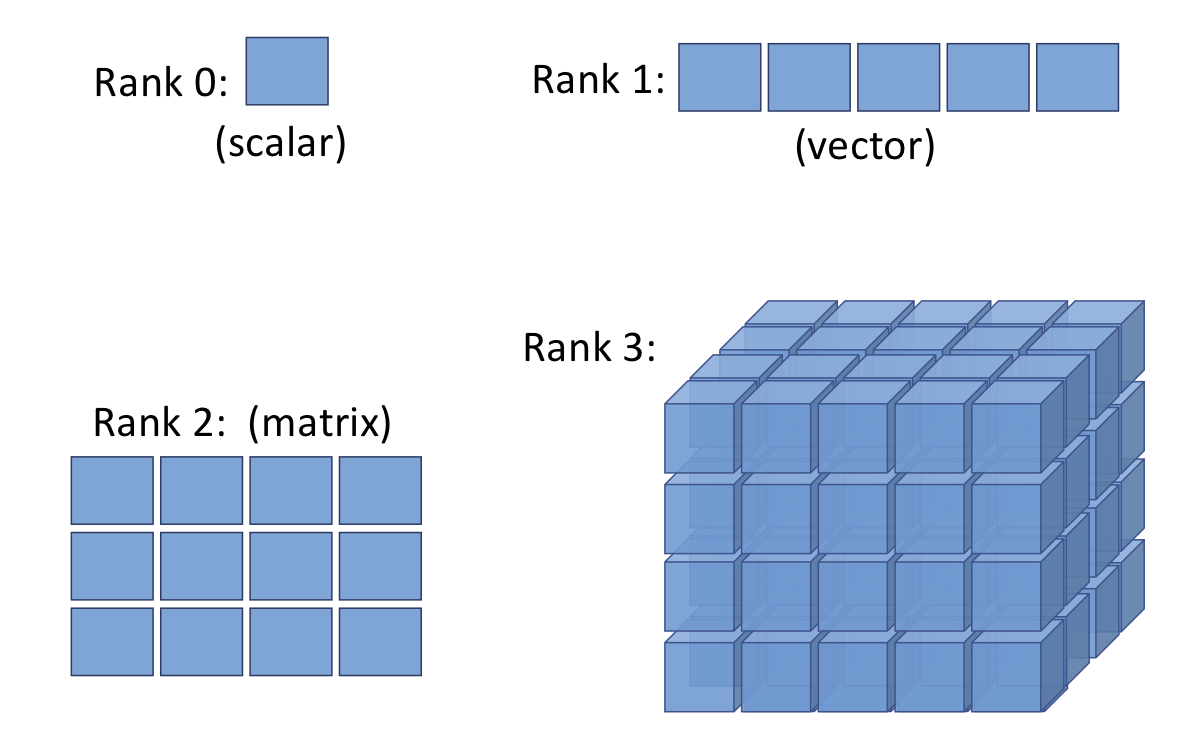

In [106]:
Image('/content/ranks.png', width=500) if IN_COLAB else display(Image(filename='ranks.png'))

Un tensore ha un certo numero di dimensioni (il **rango**, aka ***rank***), ognuna associata ad un certo numero di componenti (***shape***).

# Cos'è TensorFlow?

TensorFlow è una **libreria open source**, leader di mercato, sviluppata da [Google Brain](https://www.databricks.com/it/glossary/tensorflow-guide), per il machine learning e il deep learning, utilizzata per costruire, addestrare e implementare **modelli di intelligenza artificiale su CPU, GPU e TPU**. Supporta linguaggi come **Python**, C++ e Java, rendendola ideale per applicazioni su larga scala, inclusi dispositivi mobili e web.

TensorFlow fornisce una API **scalabile e multi-piattaforma** per implementare ed eseguire <u>algoritmi di Machine Learning</u>.

E' un software *open-source* prodotto e sostenuto da Google, con una grande comunità di supporto e moltissime risorse disponibili on-line, facilmente accessibili. Un grande team di esperti <u>migliora ed espande</u> TensorFlow in modo continuativo.

La release 0 è del 2015, la prima stabile (1.0) del 2017, l'attuale (2.X) del 2019, che è stata una major release profondamente rivista.<br>
**📌 Questo corso utilizza la versione 2.19.**

La principale novità della release 2.0 è stata la computazione **dinamica** (anzichè statica) dei grafi, anche detta *eager execution*. Inoltre TensorFlow 2 è molto più simile a *Python* e *numpy* che la v 1. e dunque risulta familiare ad un utente Python.

Una importante caratteristica di TensorFlow è la possibilità di funzionamento con **CPU o GPU, anche multiple** (la modalità raccomandata per le prestazioni molto migliori, anche di 5/6 volte). E' molto utile per allenare in modo efficiente <u>reti profonde su grandi dataset</u>. Vedi [qui](https://www.tensorflow.org/guide/gpu) su come usare le GPU con *TensorFlow*.

Infine, TensorFlow supporta il deployment su piattaforme ***mobile***.

In breve tempo TensorFlow è diventata la libreria di deep learning **più adottata** in ambito industriale. In ambito accademico, e non solo, la piattaforma di DL più diffusa è ormai PyTorch.
Se volete/potete imparare UNA sola piattaforma di DL , consiglio PyTorch.

Come vedremo adesso, TensorFlow, che è una API *low-level*, può essere incapsulata da [***keras***](https://www.tensorflow.org/guide/keras?hl=it), un'API *high_level*, più astratta e di facile utilizzo.

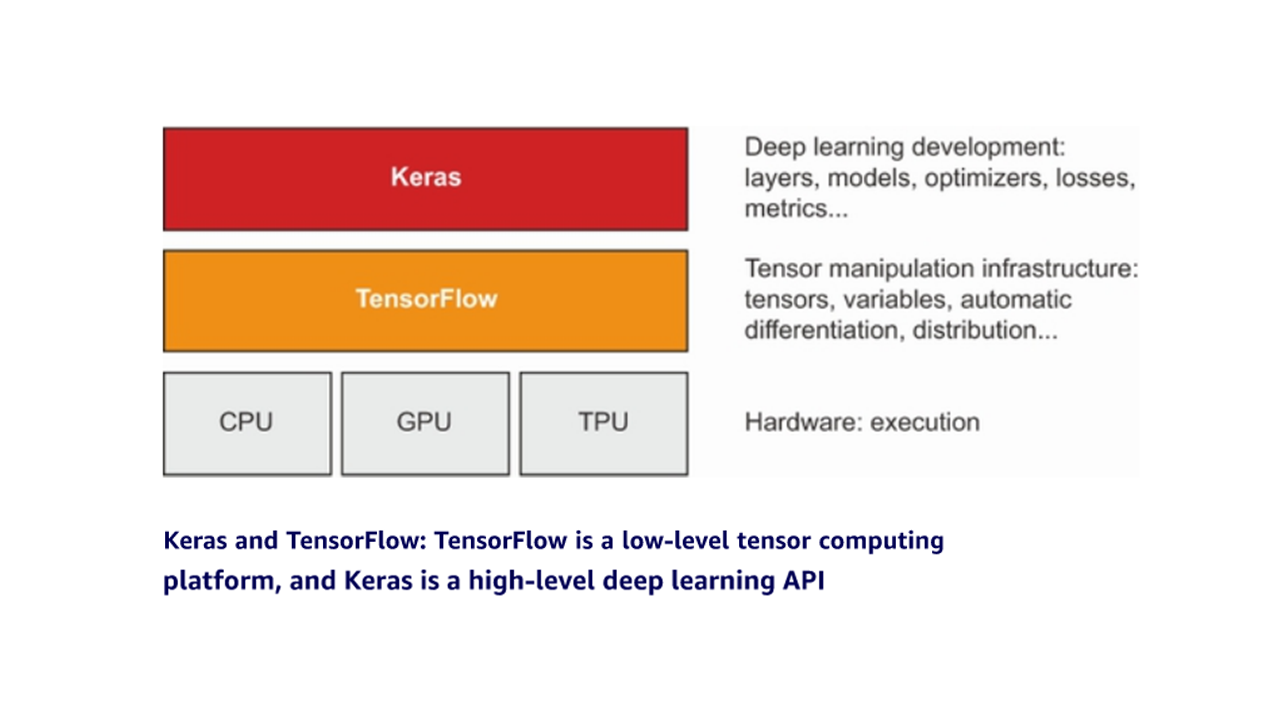

In [107]:
Image('/content/keras_tf_support.png', width=800) if IN_COLAB else display(Image(filename='keras_tf_support.png'))

---
Questo notebook di introduzione utilizza Keras per:

1. Caricare un dataset già pronto.
2. Costruire un modello di machine learning basato su **rete neurale** per **classificare immagini**.
3. Addestrare la rete neurale (il modello).
4. Valutare l’accuratezza del modello.

---

# Configurare TensorFlow

Importare TensorFlow nel notebook, per iniziare:

In [108]:
import tensorflow as tf   # qualche secondo --> versione 2.19.0 (l'ultima a febbraio 2026 è la 2.20 --> vedi sito TensorFlow)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


---
👉 Se si sta seguendo questo notebook nel <u>proprio ambiente di sviluppo</u> (Jupyter, Visual Studio Code, ecc), anziché in [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), consultare la [guida di installazione](https://www.tensorflow.org/install) per configurare correttamente TensorFlow.

Nota: in questo caso, prima di installare TensorFlow 2 nel proprio ambiente, assicurarsi di aver aggiornato il gestore dei package python `pip` all’ultima versione . Per i dettagli consultare la succitata guida di installazione. Come gestore dei package Python, comunque, è sempre **meglio usare *conda* [AP]**.

---
👉 Se si usa TensorFlow e/o PyTorch <u>proprio ambiente di sviluppo</u>, anziché in Colab, è sempre consigliato installare la **versione 3.11 di Python** (perfettamente compatibile con PyTorch e TF).<br>
Google Colab, invece, gestisce per noi queste compatibilità! (non dobbiamo preoccuparcene).

---

# I dataset di keras

`keras` rende disponibili diversi dataset per provare algoritmi di Machine Learning e Deep Learning:

* tf.keras.datasets.**boston_housing** [506,13] (**real estate: prezzi**) - <u>TABELLA STRUTTURATA</u>
* tf.keras.datasets.**california_housing** [20.640,8] (**real estate: prezzi**) - <u>TABELLA STRUTTURATA</u>
* tf.keras.datasets.**cifar10** [60.000, 32,32] (**immagini a colori 32x32** etichettate su 10  categorie) - <u>IMMAGINI A COLORE</u>
* tf.keras.datasets.**cifar100** [60.000, 32,32] (**immagini a colori 32x32** etichettate su 100 categorie fini e 20 categorie ampie) - <u>IMMAGINI A COLORE</u>
* tf.keras.datasets.**imdb** (**25.000 recensioni di film dal DB IMDB**) - <u>TESTI</u>
* tf.keras.datasets.**mnist** [70.000,28,28] (70.000 immagini 16x16 in scale di grigio di **numeri 0-9**) - <u>IMMAGINI IN GRIGIO</u>
* tf.keras.datasets.**fashion_mnist** [70.000, 28,28] (70.000 immagini 28x28 in scale di grigio su **10 categorie fashion**, è un'alternativa a mnist) - <u>IMMAGINI IN GRIGIO</u>

Useremo il penultimo (*mnist*), un dataset famosissimo. Vedi in proposito anche la [voce Wikipedia IT](https://it.wikipedia.org/wiki/MNIST_database).<br>

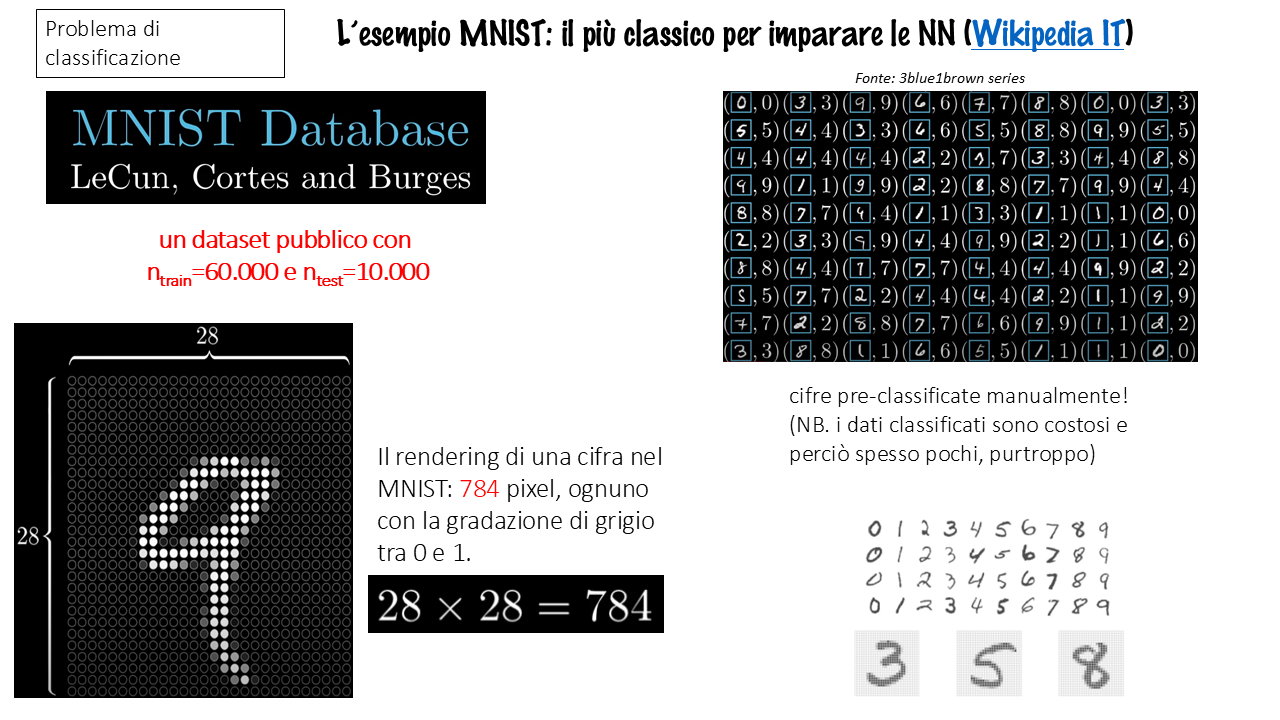

In [109]:
Image('/content/mnist_dataset.png', width=1000) if IN_COLAB else display(Image(filename='mnist_dataset.png'))

---
⭐ Tutto il codice seguente è **RIUSABILE al 100%** con qualsiasi dei dataset di *keras* prima elencati.

---

# Caricare e preparare il dataset *MNIST*.

In [110]:
mnist = tf.keras.datasets.mnist   # la tipica struttura gerarchica delle librerie Python (scikit-learn, tensorflow, pytorch)
print(type(mnist))                # la classe di mnist
mnist                             # i contenuti di mnist?!

<class 'module'>


<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

Il modulo `mnist` di *keras*, come anche gli altri sopra elencati, NON è un dataset, ma appunto un **modulo Python** che contiene funzioni (principalmente `load_data()`) per estrarli e caricarli in python.<br>
Quindi direttamente su `mnist` si può fare poco: **non contiene i dati, ma solo il modo per caricarli**.


In [111]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # il caricamento in python delle array

# Che approccio usare?
👉 A questo punto, dopo aver introdotto TensorFlow e keras e dopo aver caricato in python il dataset `mnist`, siamo pronti a costruire il nostro **classificatore**.

Lo faremo in due modi:
* nel modo **informatico** (da *nerd*?): conta solo il software, il resto è una scatola nera ❌
* nel modo **matematico-informatico**: si cerca di capire cosa stiamo facendo: assunzioni, tecniche, parametri, risultati ✅

Useremo quindi il secondo approccio.

# L'intero processo di ML predittivo sul dataset MNIST
Vogliamo capire concetti e significati ✅

Nel Deep Learning è essenziale:
* fare **un'analisi esplorativa** dei dati (prima di costruire un modello predittivo!), anche detta EDA (*Explorative Data Analysis*)
* conoscere le **assunzioni sottostanti** (soprattutto se si vuole stimare l'incertezza)
* conoscere le **tecniche** di ottimizzazione
* conoscere il **significato dei vari iper-parametri** degli algoritmi e quando/come impostarli
* saper **interpretare i risultati** degli algoritmi

## Esaminare i contenuti del dataset MNIST

Un dataset Keras (come `tf.keras.datasets.mnist`), dal punto di vista dei dati, è semplicemente un **insieme di 4 array NumPy già preparate**.

Questi dataset, infatti, nascono con uno scopo preciso: **addestrare e valutare** modelli di machine learning in modo corretto e confrontabile. Quindi servono:
* feature/predittori e risposta di **training**
* feature/predittori e risposta di **test**

I dataset keras sono quindi già **suddivisi** in questo modo.

Occorre solo **caricarle in python** con la funzione `load_data`, resa disponibile dal modulo `mnist` e da tutti gli altri moduli dataset visti prima, assegnando le 4 array **separatamente**, in questo modo:

In [112]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # il caricamento in python delle array

## Data Leakage

La suddivisione del dataset in train e test deve essere fatta **prima** di eventuali trasformazioni del dataset quali:
* standardizzazioni
* feature selection
* ecc

per evitare il problema del [*data leakage*](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) che può alterare l'affidabilità dle modello.



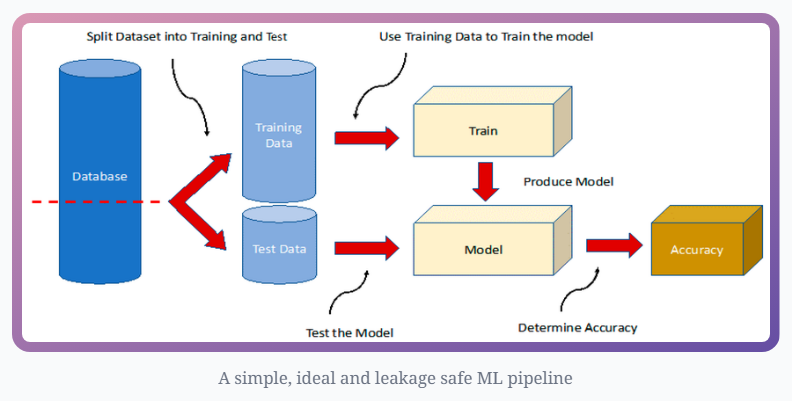

In [113]:
Image('/content/data_leakage_safeness.png') if IN_COLAB else display(Image(filename='data_leakage_safeness.png'))

Le standardizzazione, la feature selection, ecc sono fatte **sul training dataset**, dopo lo split!

## EDA (*Explorative Data Analysis*)



A questo punto ogni array è esaminabile nel modo consueto (di una array numpy), ad esempio guardando: **classe**, forma (***shape***), contenuto, distribuzioni, esempi visivi.<br>
La *shape*, in particolare, mostrerà il numero di esempi, la risoluzione delle immagini e la dimensione delle etichette.

In [114]:
print(f"Classe di x_train: {type(x_train)}")               # le CLASSI
print(f"Classe di y_train: {type(y_train)}")
print(f"Classe di x_test: {type(x_test)}")
print(f"Classe di y_test: {type(y_test)}")

print(f"Shape di x_train: {x_train.shape}")                # le SHAPE
print(f"Shape di y_train: {y_train.shape}")
print(f"Shape di x_test: {x_test.shape}")
print(f"Shape di y_test: {y_test.shape}")

Classe di x_train: <class 'numpy.ndarray'>
Classe di y_train: <class 'numpy.ndarray'>
Classe di x_test: <class 'numpy.ndarray'>
Classe di y_test: <class 'numpy.ndarray'>
Shape di x_train: (60000, 28, 28)
Shape di y_train: (60000,)
Shape di x_test: (10000, 28, 28)
Shape di y_test: (10000,)


Vediamo ora una di queste array (`x_train`):

In [115]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

`x_train` è un TENSORE di rango 3, il metodo `shape` fornisce la cardinalità di ogni dimensione.

In [116]:
# molti pixel sono 0, ma non tutti
x_train[0,9,9]  # 156 è il pixel (10,10) della prima immagine (Python conta da 0!)

np.uint8(156)

In [117]:
# per togliere il data type iniziale e vedere solo il valore dell'oggetto
x_train[0,9,9].item
# oppure
int(x_train[0,9,9])

156

I valori dei pixel delle immagini MNIST vanno **da 0 a 255**.


In [118]:
print(x_train.min())
print(x_train.max())

0
255


E' opportuno **normalizzarli al range [0,1]**, <u>dividendoli per 255</u>. Sull'utilità di questa trasformazione vedi [questa chat](https://chatgpt.com/share/6991c0ce-6450-8012-b4da-da1edf22bdac).

Questa operazione converte il data type da intero a floating point (virgola mobile). E' eseguibile **una sola volta**!

In [119]:
# operazione eseguibile SOLO UNA VOLTA!! (altrimenti ricaricare il dataset)
x_train, x_test = x_train / 255.0, x_test / 255.0         # divisione per 255 (si noti il doppio input ed il doppio output)
print(x_train.min())
print(x_train.max())
float(round(x_train[0,9,9],2))


0.0
1.0


0.61

## Configurare la rete

Per prima cosa definiamo **l'architettura** del modello (la rete neurale), cioè come è fatta: quanti **layer** (anche detti, strati o livelli), che **tipo** di layer, **quanti neuroni** per layer, come sono **collegati** i neuroni dei vari layer.

📌 **Non** è ancora il FIT (per quello vedi più avanti).



## Reti MLP

La prossima cella descrive una rete neurale MLP con due livelli nascosti (con $K_1 = 256$ e $K_2 = 128$), adatta al problema di classificazione del MNIST.

Vediamo prima cosa è una rete MLP.

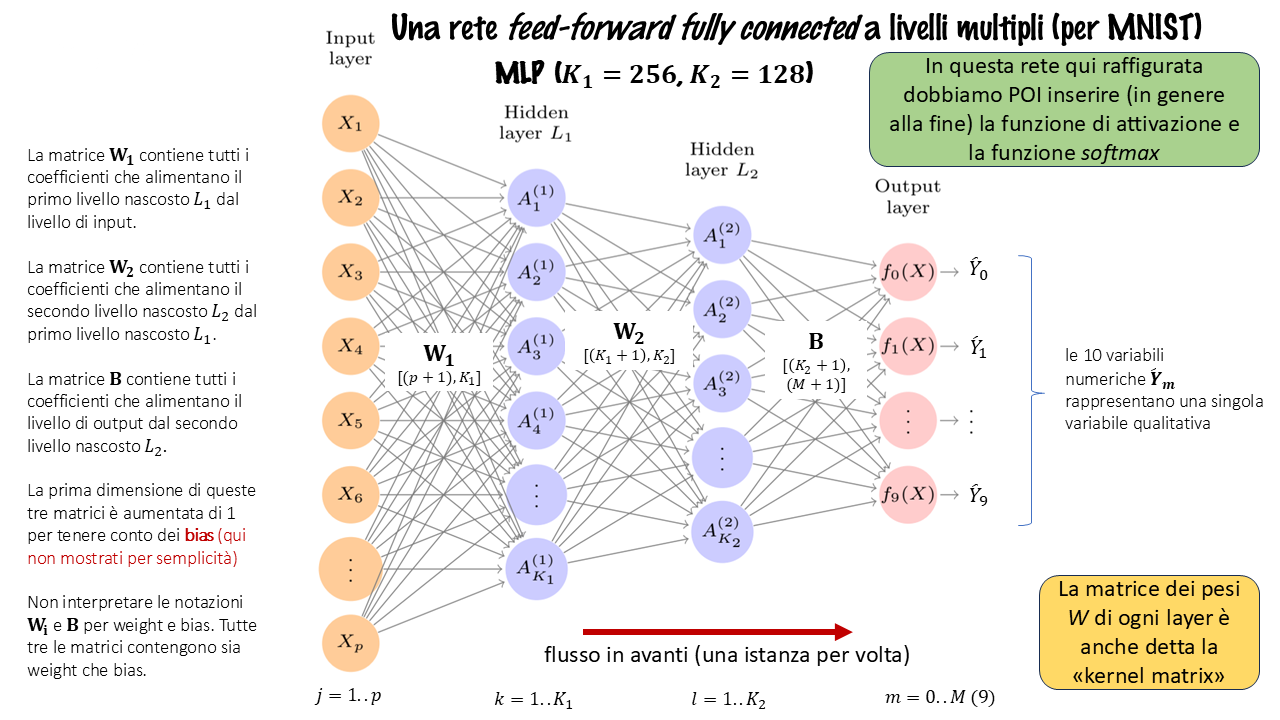

In [120]:
Image('/content/rete_MLP.png', width=1000) if IN_COLAB else display(Image(filename='rete_MLP.png'))

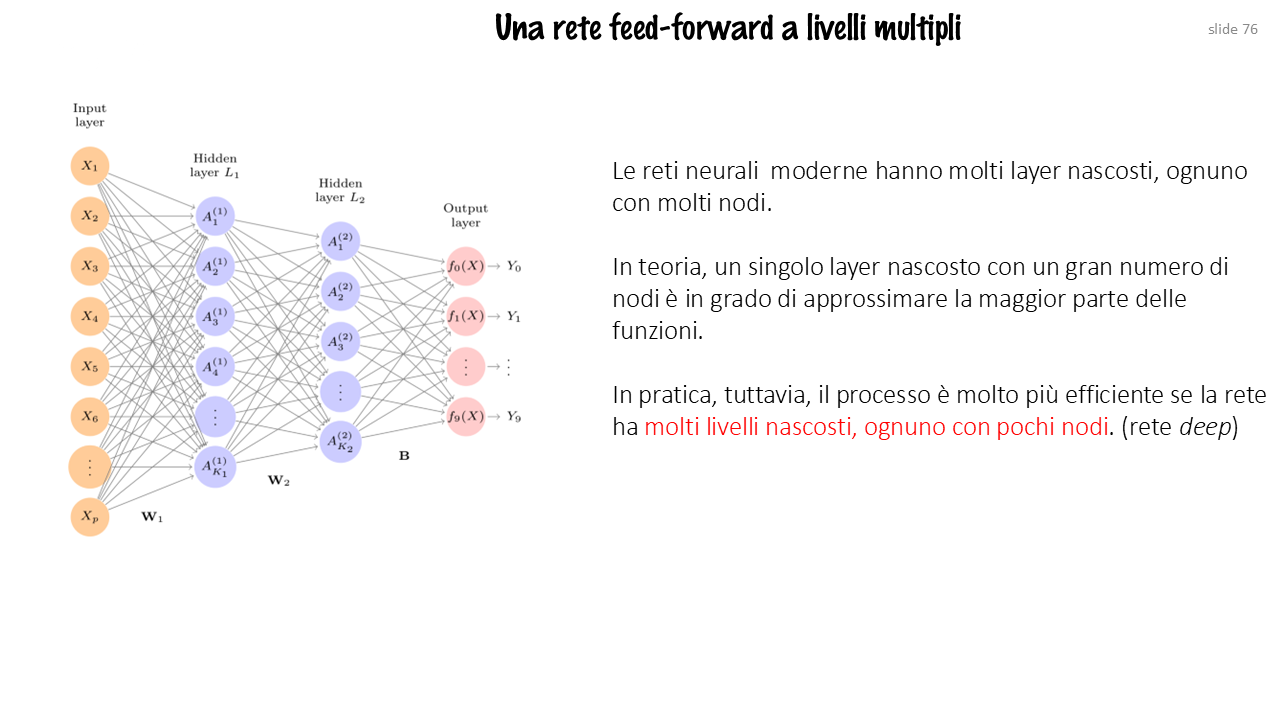

In [121]:
Image('/content/rete_MLP_2.png', width=1000) if IN_COLAB else display(Image(filename='rete_MLP_2.png'))

---
**Relazioni tra reti neurali e modelli lineari**:
- Una rete neurale feed-forward e i modelli lineari sono strettamente collegati: la prima nasce come estensione naturale dei secondi. In effetti, una rete neurale feed-forward senza non linearità è un modello lineare.
- Un classificatore feed-forward senza livelli nascosti  e con una funzione di attivazione sigmoide equivale ad una regressione logistica (combinazione lineare più sigmoide).

Vedi anche [questa chat](https://chatgpt.com/share/698e592b-b4d4-8012-9185-93114654a165).

**Torniamo** alla configurazione della nostra rete MLP.

## Configurare la rete (...continua)

Creiamo l'architettura del modello con la funzione keras `tf.keras.Sequential`.

Chiamiamo il modello `model`, per semplicità, ma ogni nome è accettabile se minuscolo e con "_" come eventuale separatore di parole (in accordo con linea guida [PEP8](https://peps.python.org/pep-0008/) di buona programmazione python).


In [122]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # Definizione esplicita dell'input (le dimensioni di ogni immagine)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


A che classe appartiene l'oggetto `model` appena creato?

In [123]:
type(model)    # --> è un modello keras di rete neurale costruito con 'Sequential'

keras.src.models.sequential.Sequential

La classe [`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) è utile per **impilare livelli** (anche detti *layer*, *strati*): ogni livello ha un [tensore](https://www.tensorflow.org/guide/tensor) di input e un tensore di output. I livelli sono funzioni con una loro struttura matematica nota, che possono essere riutilizzate e hanno variabili addestrabili (i **parametri**).

La maggior parte dei modelli di TensorFlow (MLP, CNN, RNN, Transformer, ecc) è composta da livelli, secondo questo schema:

``` text
input → layer → layer → layer → output
```
>
> TensorFlow permette di costruire anche **altri tipi di modelli**:
> 1. funzioni matematiche pure, tipo<br>
> ```python
>     y = tf.matmul(x, W) + b  # è comunque un modello
> ```
> 2. modelli scritti a mano (*subclassing*)<br>
>   Si possono costruire architetture in cui la logica non è una semplice catena di layer.
>
> 3. algoritmi non deep learning

---



Vediamo la sintesi del modello con il metodo `summary`:

In [124]:
# la sintesi:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Come si vede, questo modello utilizza **tre tipi di livello** [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) e [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Vediamo ora la spiegazione di questa rete e il significato di `None`.

### La spiegazione di questa rete

Questa configurazione è la **baseline “classica” e didattica** proposta nella documentazione ufficiale di TensorFlow **per MNIST**: <u>non è la più sofisticata possibile</u>, ma è **solida, semplice da addestrare e mette in evidenza i passaggi fondamentali** di una rete per classificazione di immagini.

Vediamo perché ogni scelta ha senso.

---

**1) `Flatten(input_shape=(28,28))`**

Le immagini MNIST sono **matrici 28×28** (pixel in scala di grigi).<br>
Una rete **Dense (fully connected)** lavora però su **vettori**, non su matrici.<br>
`Flatten` fa semplicemente: $28 \times 28 \rightarrow 784$<br
cioè trasforma l’immagine in un vettore di 784 feature.<br>
È la soluzione più **semplice e tradizionale** per:
* impostare un primo classificatore,
* spiegare il funzionamento delle reti,
* evitare la complessità delle CNN.

---

**2) `Dense(128, activation='relu')`**

Questo è il **vero strato di apprendimento**.
* 128 neuroni: numero intermedio, sufficiente per MNIST senza essere pesante.
* ReLU: scelta standard perché
  * evita saturazione del gradiente (come sigmoid/tanh),
  * accelera il training,
  * funziona bene su immagini.

Matematicamente: $z = W x + b \quad\quad a = \max(0,z)$


La rete **impara combinazioni non lineari** dei pixel.

---

**3) `Dropout(0.2)`**

Serve a **ridurre l’overfitting**.<br>
Durante il training:
* il 20% dei neuroni viene “spento” casualmente,
* la rete è costretta a non dipendere da singole feature.

Effetto:
* maggiore capacità di generalizzare,
* meno memorizzazione del training set.

MNIST è semplice, ma una `Dense` pura tende comunque a overfittare senza regolarizzazione.

---

**4) `Dense(10)**

E' il layer di output:
* MNIST ha **10 classi** (cifre 0–9),
* quindi 10 neuroni.

Non c’è attivazione qui perché:
* questo layer produce i **logits**,
* la `softmax` verrà applicata direttamente dentro la loss (tipicamente con la classe `SparseCategoricalCrossentropy(from_logits=True)`).

I logits sono: $z_k = W_k x + b_k$

che rappresentano i log-odds prima della probabilità.

---

**Perché proprio questa architettura?**

Perché soddisfa 4 obiettivi chiave:
* **1. Didattica**

  Mostra la pipeline base:

  * input
  * trasformazione
  * apprendimento
  * regolarizzazione
  * output

* **2. Stabilità**

  È difficile che:

  * diverga,
  * non converga,
  * richieda tuning complicato.

* **3. Efficienza**

  * pochi parametri,
  * training veloce anche su CPU.

* **4. Benchmark storico**

Questa struttura è diventata una sorta di **“standard minimo”** per:
* confrontare modelli,
* introdurre il deep learning.

---

**Ma è il modello migliore per MNIST?**

No.<br>
È una scelta **semplice e robusta**, non ottimale.<br>
Per MNIST funzionano meglio:

* CNN (`Conv2D` + `MaxPooling`)
* architetture LeNet-like
* modelli con batch normalization

Perché:
* l’informazione spaziale dell’immagine non viene distrutta dal `Flatten`.

---

**Intuizione finale**

Questa rete è, di fatto:
* una **regressione logistica multilivello** sui pixel,
* con una sola hidden layer non lineare.

È **il punto di partenza più naturale** per capire:
* cosa sono i logits,
* cosa fa una `Dense`,
* perché serve la non linearità,
* come si evita l’overfitting.

Da qui si passa poi alle CNN, che rappresentano il passo evolutivo naturale per la classificazione di immagini.


### Cosa significa `None`

In `model.summary()` **`None` è la dimensione del batch** (cioè quante immagini vengono processate insieme) e viene lasciata **non fissata**.

**Cosa significa in pratica?**
* `Output Shape (None, 784)` vuol dire: **(batch_size, 784)**
* `None` = “batch_size sconosciuto/variabile a runtime”.

Keras costruisce il modello in modo da poter usare <u>batch di dimensione diversa a seconda del caso</u>:
* training magari con `batch_size=32` o `64` --> è un argomento del metodo `fit` (vedi più avanti)
* validazione con un altro batch
* inferenza anche con **una sola immagine** (`batch_size=1`)

Per questo la prima dimensione resta “aperta” e compare `None` a ogni livello:<br>
è sempre **la stessa dimensione “numero di esempi nel batch”, che scorre attraverso tutti i layer**.

**E quando NON è `None`**?<br>
Diventa un numero fisso se si **vincola esplicitamente** la *batch dimension*, ad esempio definendo un input con `batch_size` fissato (o `batch_input_shape`), ad esempio a 32. In quel caso il *summary* produce `(32, 784)` invece di `(None, 784)`.

In sintesi: `None` non è un errore, è una scelta voluta per mantenere il modello flessibile.


La definizione/configurazione dell'architettura di una rete neurale è la fase nella quale **si decide** il numero di layer e di neuroni, come detto prima, ma anche:
* la modalità di **costruzione della rete in keras** (*Sequential* oppure *Functional API* oppure *Subclassing*)
* le **funzioni di attivazione** (qui *ReLU*)
* la presenza di **regolarizzazione** (*drop-out*)

Non ci sono ancora:
* la funzione di loss (definita con il metodo `compile`, vedi più avanti)
* l'ottimizzatore (definito con il metodo `compile`, vedi più avanti)
* l'addestramento (fit) - con l'apposito metodo con il metodo `fit`, vedi più avanti

Questa fase è l’equivalente del progetto di un edificio prima della costruzione.

## Fare le previsioni

Per ogni esempio (immagine), il modello - che abbiamo prima chiamato `model` per semplicità, ma che avremmo potuto chiamare `pippo`, `pluto` o `paperino`, a nostra libera scelta - restituisce **un vettore di [logits](https://developers.google.com/machine-learning/glossary#logits)** o punteggi di [log-odds](https://developers.google.com/machine-learning/glossary#log-odds), uno per ciascuna classe.

In [125]:
x_train.shape

(60000, 28, 28)

Il dataset delle immagini di training (i pixel) è un tensore di rango 3 e dimensioni **[60.000,28,28]**.

In [126]:
x_train[:1] # la prima immagine (la 0 - python conta da 0), con tutti i 784  (28x28)
            # è una array sparsa, cioè fatta soprattutto di 0

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

Per sapere cosa è una matrice sparsa, vedi [questa voce di Wikipedia EN](https://en.wikipedia.org/wiki/Sparse_matrix).

In [127]:
predictions = model(x_train[:1]).numpy()



Il metodo keras/TF `.numpy()` **converte un tensore in una array *numpy***. C'è un metodo analogo anche in *PyTorch*. In questo modo **le previsioni sono ora compatibili con *scikit-learn* (la libreria Python di Machine Learning) e con l'importante package di grafica *matplotlib*** (per plot base e plot avanzati).

Vediamo ora le `predictions`, cioè i 10 score di classe per la prima immagine di training, più precisamente detto **il vettore dei logit**.

In [128]:
predictions

array([[-0.42406964,  0.02609573,  0.07719222,  0.72815543, -0.20420541,
         0.22385447,  0.3341169 , -0.73940766, -0.23656493,  0.16907032]],
      dtype=float32)

Spieghiamo meglio.<br>
Dopo aver configurato una rete di nome `model`, quando si inserisce un’immagine in input, il modello produce in uscita **un vettore di 10 numeri, uno per ciascuna cifra possibile (0–9)**.<br>
Questi numeri si chiamano <u>logits</u>.

---
👉 Punto chiave: queste previsioni sono state calcolate **eseguendo il solo passo in avanti (*feed-forward*), senza ancora iterazioni**!<br>

---

## Feed-forward pass
La rete può già produrre output anche senza ancora aver fatto `compile()` e `fit()`.
Sta solo facendo **un forward pass, da sx a dx (layer per layer), non sta imparando (con un loop)**.
In questa riga succedono tre cose:
* il modello riceve un input
* propaga i dati attraverso i layer
* restituisce l’output dell’ultimo layer

Non c’è training. È solo:
```text
input → rete → output
```
**Perché funziona anche senza `compile()` / `fit()`?**<br>
`compile()` serve solo a definire:
* funzione di loss
* ottimizzatore
* metriche di accuratezza

cioè tutto ciò che serve **per l’addestramento**, non per il calcolo dell’output.

> **Il modello è pensato come funzione matematica $𝑓(𝑥;\theta)$, dove $\theta$ sono tutti i mparametri della rete visti prima. Il modello esiste già dopo la costruzione, anche prima dell’ottimizzazione.**

`fit()` è il momento in cui:
* i pesi vengono aggiornati
* la rete impara

Prima del fit:
* i pesi sono inizializzati *casualmente*
* **quindi l’output esiste, ma è casuale**.

---
## Nota sui logits

Abbiamo visto prima che il feed-forward pass produce dei **logits**. Cosa sono esattamente?

Nelle reti neurali, i **logits** sono i **valori numerici grezzi** prodotti **dall’ultimo strato (layer) del modello** <u>prima</u> di applicare una funzione di attivazione come *softmax* (per classificazione multinomiale, cioè $n$ classi) o *sigmoide* (per classificazione binaria).<br>
In pratica:
* La rete elabora gli input, una istanza per volta od a batch, attraverso vari strati (layer), da sx a dx.
* L’ultimo strato lineare calcola una combinazione del tipo $(z= W x + b )$
* I numeri $(z)$ ottenuti sono i **logits**.

Non sono probabilità:
- non sono tra 0 e 1
- non sommano a 1
- possono essere negativi o molto grandi

📌 Sono solo **punteggi grezzi** (*raw scores*), "non normalizzati*, che indicano quanto la rete “propende” per ciascuna classe.

---
**Perché si chiamano così**<br>
Il termine viene da *log-odds* (logaritmo del rapporto di probabilità).<br>
Dopo aver applicato le funzioni appropriate, i logits vengono trasformati in probabilità.

**Esempio: classificazione multiclasse**<br>
L'ultimo layer produce:
$\text{logits} = [2.1, 0.3, -1.4]$.<br>
Questi **non** sono interpretabili direttamente come probabilità.<br>
Applicando la **softmax**: $p_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ si ottiene ad esempio:
$[0.80, 0.16, 0.04]$<br>
Ora sì: queste sono probabilità sulle classi.

---

**Caso binario**
* Output della rete: un singolo logit $(z)$
* Applicando la **sigmoid**: $p = \frac{1}{1 + e^{-z}}$ si ottiene la probabilità dell’evento.

---

**Perché si usano direttamente nei loss**:<br>
Molte funzioni di costo lavorano sui logits, non sulle probabilità:
* **Binary cross-entropy with logits** --> vedi [questa chat](https://chatgpt.com/share/6991e269-c924-8012-b546-fc1b8c3d58ff)
* **Cross-entropy loss (PyTorch, TensorFlow)** --> vedi [questa chat](https://chatgpt.com/share/6991e2b3-97c4-8012-a5e4-b183f87afdd9)

Motivo: maggiore **stabilità numerica**.<br>
*Softmax* e *sigmoid* vengono incorporate internamente nel calcolo della loss, evitando overflow/underflow.

---

**Intuizione operativa**<br>
I logits rappresentano:
* la “fiducia grezza” del modello verso ogni classe
* valori su scala reale: $(-\infty, +\infty)$
* non vincolati a sommare a 1

Più un logit è alto rispetto agli altri, più la rete considera probabile quella classe.<br>

In sintesi:
> logits = output lineare finale della rete
> probabilità = attivazione (softmax/sigmoid) applicata ai logits

Sono il passaggio intermedio fondamentale tra il calcolo matematico del modello e l’interpretazione probabilistica del risultato.

**FINE NOTA sui LOGIT**

---

Dopo questa nota sui logits, verifichiamone la natura:

In [129]:
import numpy as np
round(float(np.sum(predictions)),2)  # la somma non dà 1.

                                     # attenzione alla pipeline di funzioni; dall'interno verso l'esterno:
                                     # - 'np.sum(predictions)' restituisce: 'np.float32(0.04411088)'
                                     # - 'float' elimina il datatype e lascia solo il valore '0.04411088'
                                     # - 'round' arrotonda a 2 cifre decimali --> '0.04'

-0.05

Come si vede, sono score che NON sommano a 1.<br>
La funzione `tf.nn.softmax` converte questi logits in ***probabilità*** per ciascuna classe. Il metodo finale `.numpy`, invovato in sequenza, traduce il tensore in **array numpy**, più comoda per determinate elaborazioni.

In [130]:
tf.nn.softmax(predictions).numpy()

array([[0.06089422, 0.09551693, 0.10052437, 0.19274408, 0.07586856,
        0.11640347, 0.12997274, 0.0444249 , 0.07345279, 0.11019793]],
      dtype=float32)

In [131]:
# ora i logits sommano a 1!
round(float(tf.nn.softmax(predictions).numpy().sum()),2)

1.0

Nota: è possibile incorporare `tf.nn.softmax` nella funzione di attivazione dell’ultimo livello della rete. Sebbene questo renda l’output più interpretabile, l’approccio è sconsigliato perché non consente un calcolo della loss sempre esatto e numericamente stabile.


**Riassumendo**, il processo è il seguente:

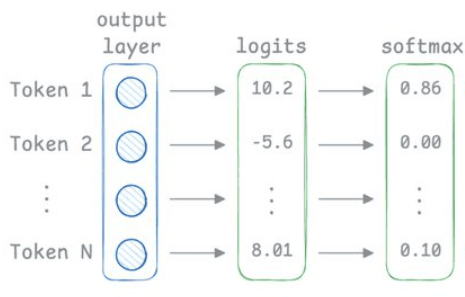

In [132]:
Image('/content/softmax.png', width=500) if IN_COLAB else display(Image(filename='softmax.png'))

---
## Nota sulla *softmax*

📌 La **softmax da sola non rende il modello non-lineare**.

È solo una funzione di normalizzazione che trasforma un vettore di punteggi (*logits*) in probabilità che sommano a 1. Se i logits provengono da una combinazione lineare delle feature, l’intero modello resta lineare.

**Caso tipico**

Classificatore multinomiale “base”: $$z = Wx + b$$ <br> $$\hat{p} = \text{softmax}(z)$$

Qui:

* $(Wx+b)$ è lineare nelle feature
* la *softmax* non introduce capacità di modellare relazioni non lineari nello spazio degli input
* il modello è l’equivalente multiclass della **regressione logistica**

Decision boundaries → **iperpiani lineari**.

---

Quando diventa non lineare?<br>
La non linearità nasce **nei livelli nascosti**, non nella *softmax*.<br>
Esempio MLP: $$\sigma(W_1 x + b_1)$$ <br> $$z = W_2 h + b_2$$ <br>$$\hat{p} = \text{softmax}(z)$$

Qui la non linearità è introdotta da:

* sigmoid
* ReLU
* tanh
* ecc.

La *softmax* serve solo a:
* convertire gli score finali (logit) in probabilità
* rendere il modello adatto alla classificazione multinomiale

---

**Intuizione**
* *softmax* = “interpreta” l’output
* livelli con attivazioni non lineari = “imparano relazioni complesse”

Senza questi ultimi:
* si ha un classificatore multinomiale **lineare**
* non molto diverso dalla regressione logistica multiclasse (one-vs-rest o multinomial logit)

---

**Sintesi**
* Classificazione multinomiale ≠ automaticamente non lineare
* *softmax* da sola **non basta**
* la non linearità arriva solo con:
  * hidden layer
  * funzioni di attivazione non lineari
* la *softmax* è lo strato finale, non il meccanismo che “fitta” relazioni non lineari.

---
Vediamo infine un **utile video** sulla funzione *softmax*:<br>
a questo scopo occorre caricare nella *sessione storage* di Google Colab il file mp4 `Softmax_ita`.

In [133]:
!ls /content

 architettura_mnist_keras.png   iterazioni.png		      rete_MLP_3.png
 backpropagation.png	        keras_tf_support.png	      rete_MLP.png
 batch.png		        loss_function_2.png	      RMSE.png
 bias_varianza_tradeoff.png     loss_function.png	      sample_data
 bias_vs_varianza.png	        MLP_con_backpropagation.png   sigmoide.png
 data_leakage_safeness.png      mnist_dataset.png	      Softmax_ita.mp4
'Discesa_Gradiente (1).pdf'     overfit_vs_underfit.png       softmax.png
 Discesa_Gradiente.pdf	        ranks.png		      varie_MLP.png
 funzioni_attivazione.png       rete_MLP_2.png


In [134]:
from IPython.display import Video
Video("/content/Softmax_ita.mp4", embed=True)


## Definire una *loss function*

Per calcolare numericamente **la bontà predittiva** del passo feed-forward occorre definire una **funzione di perdita** (letter. *loss function*).

> In estrema sintesi:<br>
> 👉 Una **loss function** serve a **misurare quanto il modello predittivo sta sbagliando (le previsioni)**.<br>
> È un numero che indica la distanza tra:
> * **ciò che il modello predice**
> * **il valore corretto reale** (in gergo delle NN, detto *ground truth*)
>
> Più la loss è alta → più il modello sta sbagliando.<br>
> Più la loss è bassa → più il modello è accurato.
>
> Durante l’addestramento, l’algoritmo cerca di **minimizzare la loss**, cioè ridurre l’errore il più possibile.

---
📌 La *loss function* è calcolata in modo aggregato su un insieme di previsioni (e non sulla singola!).

---
**A che dataset si applica la *loss function***? Al training dataset od al test dataset?<br>
Si applica **a entrambi**, ma con scopi diversi:
* **Training** → la loss viene usata per **aggiornare i pesi** del modello (tramite backpropagation). Qui è fondamentale perché guida l’apprendimento.
* **Test / Validation** → la loss viene solo **calcolata per valutare** quanto il modello generalizza, ma **non aggiorna i pesi**.

---
In breve:
* 🔧 **Training** → la loss serve per imparare.
* 📊 **Test** → la loss serve per misurare le prestazioni.
---

La seguente figura illustra il funzionamento di base di una *loss function*:



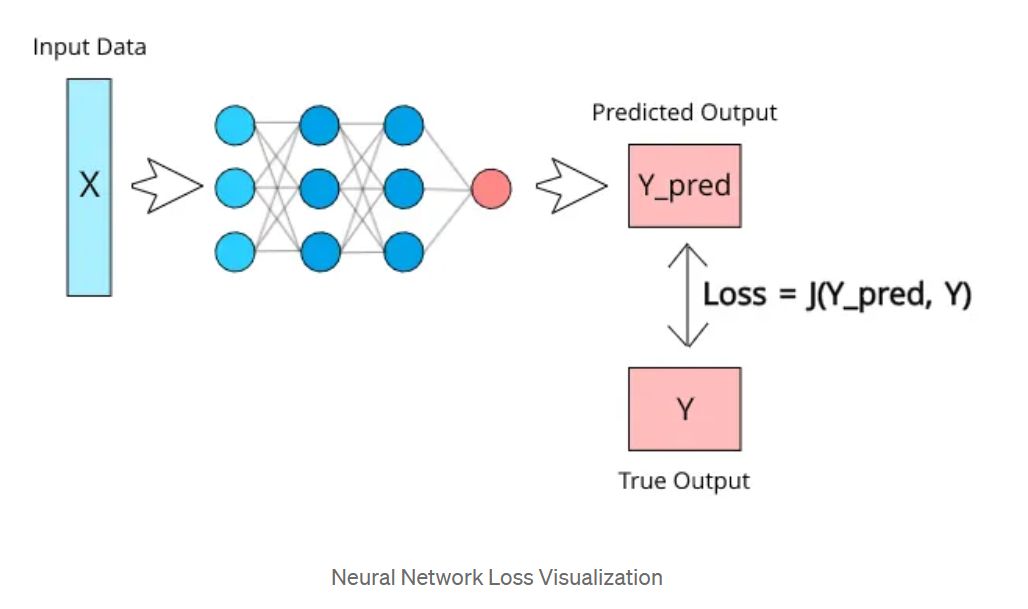

In [135]:
Image('/content/loss_function_2.png', width=500) if IN_COLAB else display(Image(filename='loss_function_2.png'))

La formula è spesso la seguente:
 $$J(\theta)=\frac{1}{n}\sum_{i=1}^{n}\mathcal{L}\big(\hat{y}_i, y_i\big)$$

$J(\theta)$ (il suo nome deriva da Jacobiano) è la **funzione obiettivo, da minimizzare**.<br>
$\mathcal{L}(\hat{y}_i, y_i)$ è la vera funzione di perdita (una parte della funzione obiettivo). Spesso i due concetti sono indistinti.<br>
$\theta$ sono i **parametri** della rete da ottimizzare.<br>
$\hat{y}_i$ è la risposta **prevista** per l'istanza *i*.<br>
$y_i$ è la risposta **effettiva** per l'istanza *i*.

NB. Nella figura precedente, la notazione è invertita, cioè: $\mathcal{J}(\hat{y}_i, y_i)$ è la funzione di perdita.

---
Il punto chiave: perchè $J(\theta)$ è funzione di $\Theta$ se $\mathcal{L}(\hat{y}_i, y_i)$ è funzione di $\hat{y_i}$ e $y_i$? Perchè quest'ultima dipende dai parametri $\theta$, quindi, formalmente, è funzione della previsione e del valore reale. Cioè la previsione non è autonoma: dipende dal modello e quindi dai parametri!

Il vettore dei parametri $\theta^{*}$ **ottimali**, cioè quelli che minimizzano la funzione obiettivo o di perdita, è così definito:

$$\theta^{*} = \arg\min_{\theta} \mathcal{L}(\theta)$$


Ce sono **varie funzioni di loss disponibili**, a seconda che il modello predittivo da fittare sia di <u>classificazione o regressione</u> ed a seconda del problema. Eccone alcune:

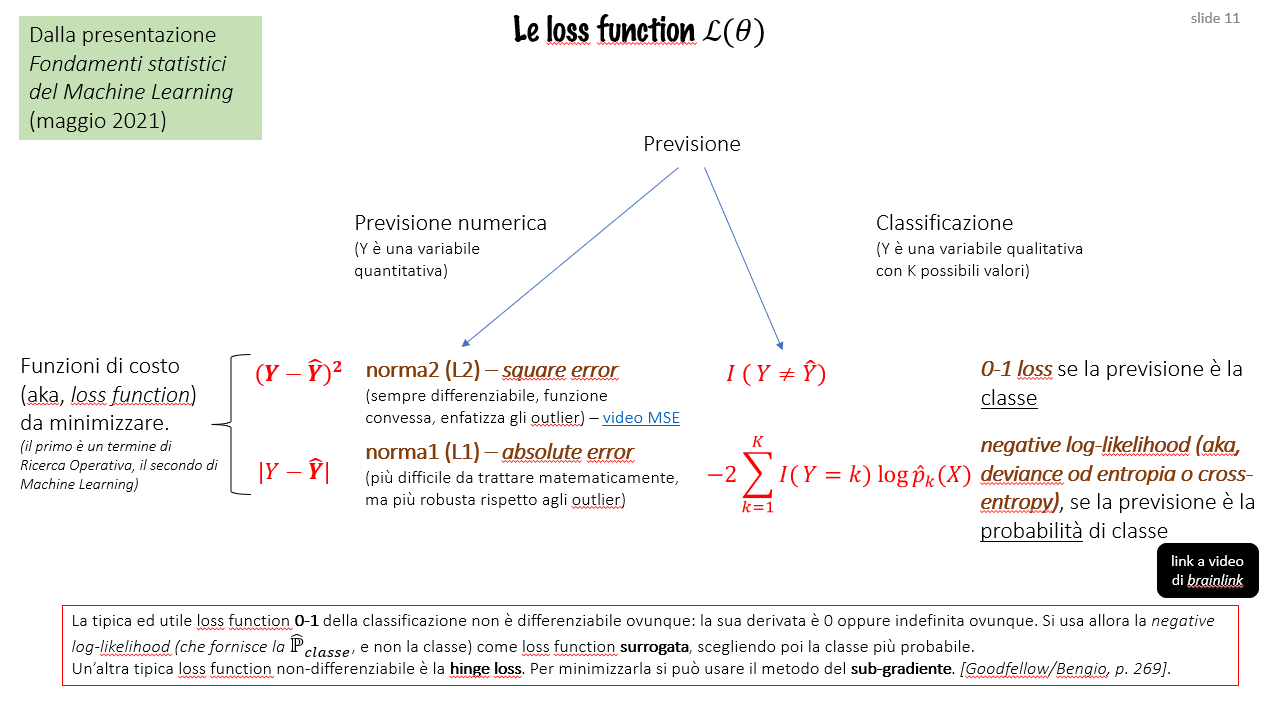

In [136]:
Image('/content/loss_function.png') if IN_COLAB else display(Image(filename='loss_function.png'))

Il video di *brainlink* citato nella slide è disponibile [qui](https://www.tiktok.com/@brainlink_project/video/7569353458864721174?is_from_webapp=1&sender_device=pc).

Vedi anche [questo bell'articolo di Medium](https://medium.com/deep-learning-demystified/loss-functions-explained-3098e8ff2b27) sulle *loss function* per le reti neurali (*Deep Learning*).

👉 Il nostro problema è di **classificazione** (*MNIST*). Utilizziamo la classe `losses.SparseCategoricalCrossentropy`, una delle più usate nella classificazione. Vedi [qui](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) per la documentazione ufficiale di TensorFlow di questa funzione.

Chiamiamo genericamente la nostra funzione  **istanziata** `loss_fn`. Il seguente comando istanzia un oggetto della classe `SparseCategoricalCrossentropy`, secondo la consueta logica OOP.

In [137]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

👉 Come visto in una delle figure precedenti la funzione di perdita prende un **vettore di valori di "verità di base" (*ground truth*)** e un **vettore di logit** (previsti) e restituisce **una perdita scalare per ogni esempio (istanza da classificare). Questa perdita è uguale al logaritmo negativo della probabilità della classe vera: la perdita è zero se il modello è sicuro della classe corretta.

Questo modello, non ancora addestrato, fornisce probabilità prossime alla casualità (1/10 per ciascuna classe), quindi la perdita iniziale dovrebbe essere prossima a `-tf.math.log(1/10) ~= 2.3`.

Vediamone un'applicazione:

In [138]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.150693)

Ok, non troppo differente!

## Compilare il modello

Siamo ora pronti ad un passo chiave: **compilare il modello**, tramite il metodo `compile()` di keras, che **definisce come il modello impara**.

Serve a specificare:
* funzione di perdita (loss)
* algoritmo di ottimizzazione (optimizer)
* metriche di valutazione


📌 `compile()` configura il processo di training, non l’architettura, che è stata prima definita dalla classe `Sequential`. Non confondere!

Impostiamo i 3 argomenti chiave del metodo `compile()` in questo modo:
* la funzione di perdita sulla funzione `loss_fn` definita in precedenza,
* l’[`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) su `adam` (uno dei più diffusi),
* la metrica  di valutazione del modello con `metrics=accuracy` (per semplicità)


In [139]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Addestrare il modello

Siamo ora pronti all'allenamento della nostra rete (il modello `model`)!

**Termini**: allenamento, addestramento, training, fit sono **più o meno sinonimi**.

### Il fit (adattamento)

Usiamo il metodo `Model.fit` di keras per adattare i parametri del modello e minimizzare la loss. [Qui](https://keras.io/api/models/model_training_apis/) la documentazione ufficiale di keras.

In [140]:
model.fit(x_train, y_train, epochs=5)  # su CPU una ventina di secondi

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.4847
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9544 - loss: 0.1518
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9661 - loss: 0.1085
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0829
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9780 - loss: 0.0720


---
📌 Il fit di una grande rete neurale, con milioni di parametri, può richiedere molto tempo. E' qui che **la GPU può fare la differenz**a!

**In cosa consiste il fit?**<br>
La figura seguente ne illustra la **dinamica di base (iterativa)**. Cioè il fit attraversa la rete (letter. "si propaga") molte volte, in avanti (da sx a dx) ed all'indietro (da dx a sx) con la **back-propagation**.

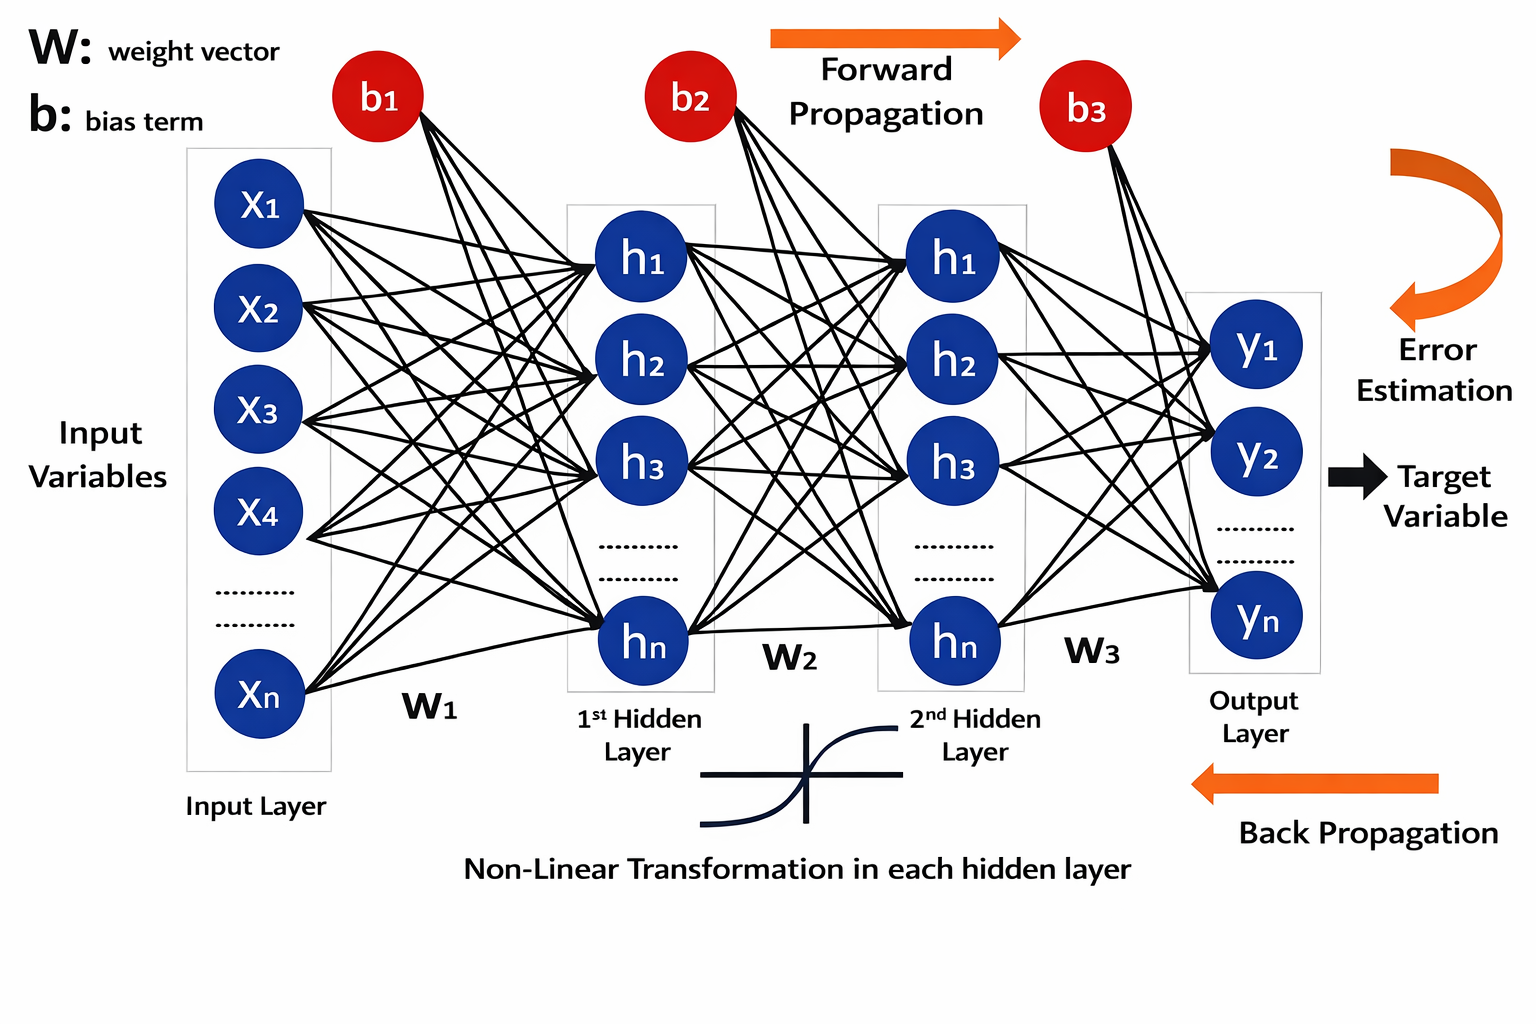

In [141]:
Image('/content/MLP_con_backpropagation.png', width=1000) if IN_COLAB else display(Image(filename='MLP_con_backpropagation.png'))

> Questa figura contiene alcune piccole imprecisioni di notazione. Ci interessa tuttavia la **dinamica generale**.

Per comprendere questa dinamica dobbiamo **approfondire alcuni concetti**:
* spazio dei parametri $\Theta$ (anche detto *theta space*)
* [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) - un algoritmo definito nel 1986 da [Geoffrey Hinton](https://it.wikipedia.org/wiki/Geoffrey_Hinton) ed altri, poi successivamente perfezionato
* [discesa (stocastica) del gradiente](https://it.wikipedia.org/wiki/Discesa_del_gradiente)
* iterazioni (a vari livelli)

### Lo spazio dei parametri $\Theta$
E' fondamentale comprendere questa distinzione di spazi lineari:
* l'**ottimizzazione** (la minimizzazione della funzione di loss sul training dataset) avviene nello <u>spazio dei parametri $\Theta$</u>
* il **modello risultante** è una funzione definita nello spazio dei predittori / feature $\mathbb{R}^p$, ed è lì che si osserva il fit ai dati



### La backpropagation

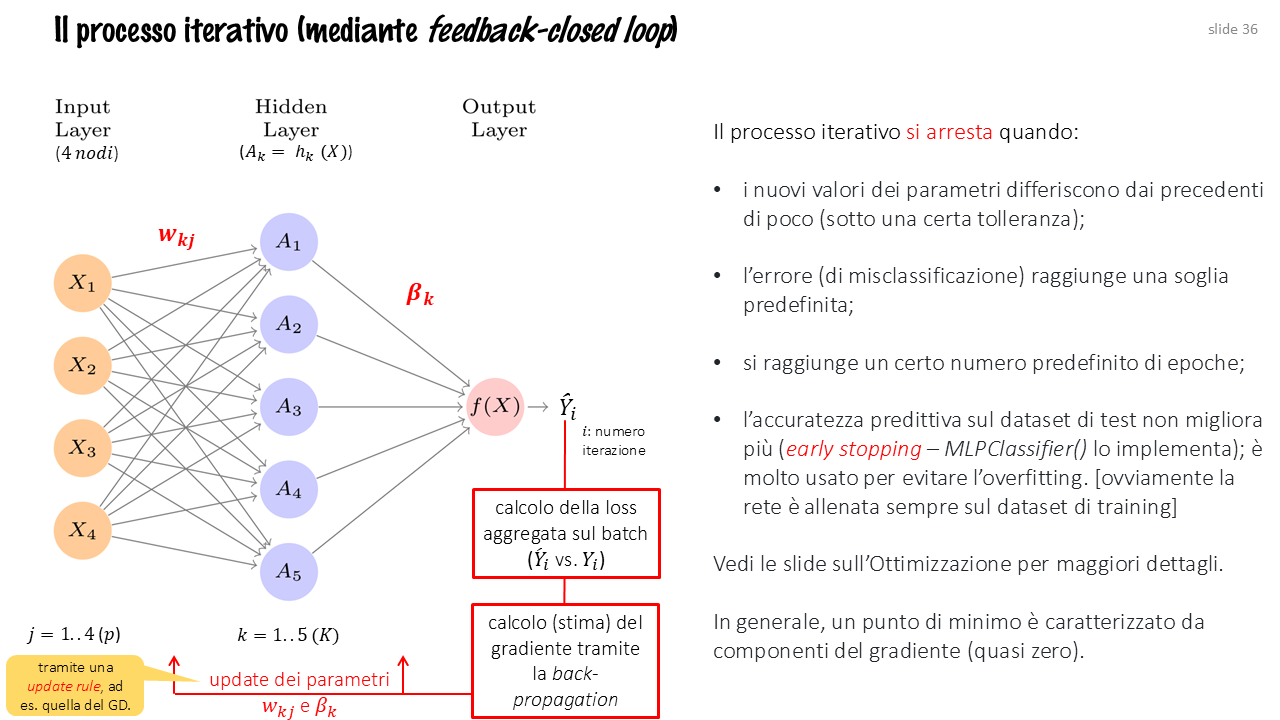

In [ ]:
Image('/content/backpropagation.png', width=1000) if IN_COLAB else display(Image(filename='backpropagation.png'))

### La discesa del gradiente

E' l'algoritmo di ottimizzazione (della loss function sul ttraining dataset). Usa la tecnica della back-propagation per calcolare il gradiente in modo più efficiente.

Eseguire la cella seguente per scaricare nella *storage session* il file PDF ***Discesa_Gradiente*** e poi fare <u>doppio click</u> sopra per aprirlo.

Attenzione: la prima slide chiama la funzione di loss $\mathcal{L}(\theta)$: $\mathcal{C}(\omega)$

In [142]:
if IN_COLAB:
  from google.colab import files
  uploaded = files.upload()  # si aprirà un prompt per caricare il PDF

Saving Discesa_Gradiente.pdf to Discesa_Gradiente (2).pdf


### Le iterazioni

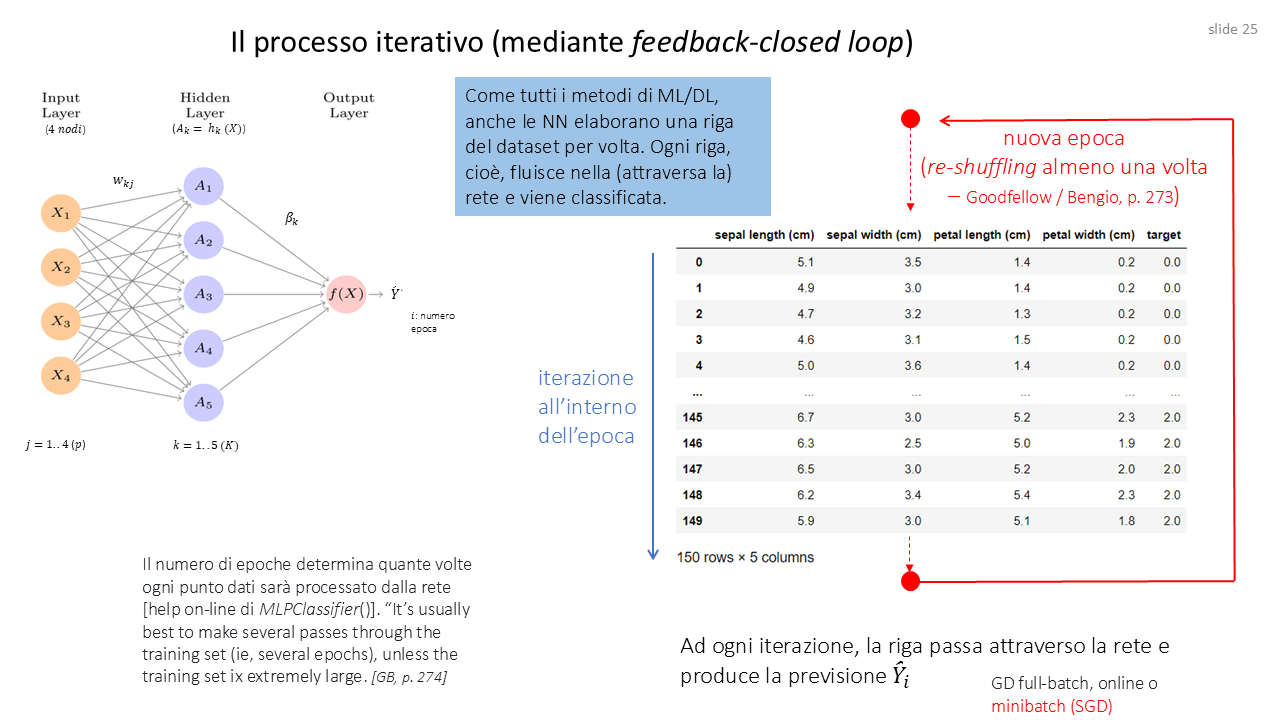

In [ ]:
Image('/content/iterazioni.png', width=1000) if IN_COLAB else display(Image(filename='iterazioni.png'))

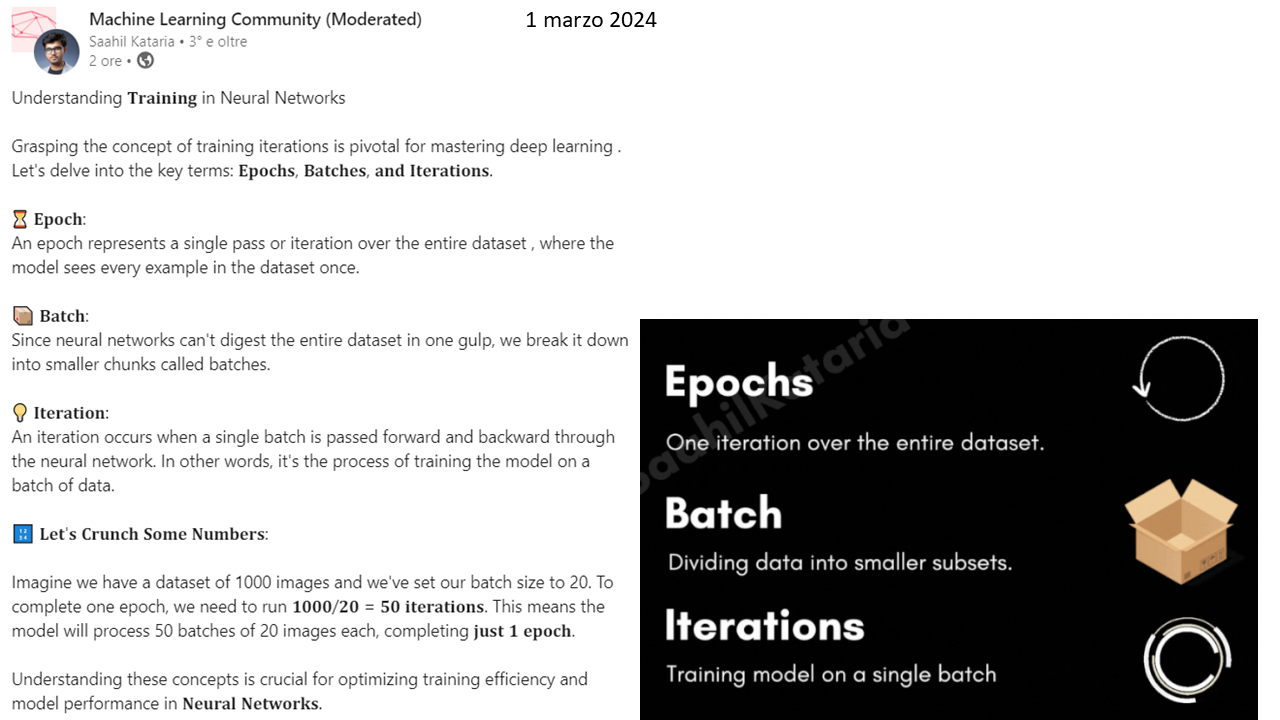

In [ ]:
Image('/content/batch.png', width=1000) if IN_COLAB else display(Image(filename='batch.png'))

## Valutare il modello

Vogliamo infine, come ultimo passo, valutare le **capacità predittive** del modello sul **dataset di test** (il nostro futuro conosciuto).

Il metodo  `Model.evaluate` calcola le prestazioni (predittive) del modello, in genere su un [dataset di validazione](https://developers.google.com/machine-learning/glossary#validation-set) o su un [dataset di test](https://developers.google.com/machine-learning/glossary#test-set).

In [157]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9768 - loss: 0.0751


[0.07513541728258133, 0.9768000245094299]

Il classificatore di immagini è ora allenato con un’accuratezza di test di circa il 98% su questo dataset MNIST. Per approfondire, consultare i [tutorial TensorFlow](https://www.tensorflow.org/tutorials/).

Vogliamo ora calcolare la [**matrice di confusione**](https://en.wikipedia.org/wiki/Confusion_matrix), sempre sui dati di ***test***. Sono necessari <u>alcuni passi standard</u>:

1) **Previsioni** del modello sui dati di **test** con il metodo `predict`.<br>
Nel gergo del ML/DL sono dette **inferenze**.

    Nel deep learning le inferenze sono semplicemente le previsioni che il modello produce **quando viene usato, dopo l’addestramento**.

    In altre parole:
    * training → la rete **impara**, aggiornando i pesi, sino ad ottimizzarli
    * inferenza → la rete **usa** quei pesi per prevedere la risposta su nuovi predittori / feature

    > **È la fase operativa del modello.**

In [161]:
logits = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


Cosa significa `313/313`?<br>
Non è un risultato del modello: è semplicemente la **barra di avanzamento dell’inferenza**.<br>
Keras sta indicando che sta elaborando il test dataset **a blocchi (batch)**.
* 313 = numero di batch necessari per processare `x_test`
* /313 = totale dei batch da elaborare

Quando arriva a `313/313` significa che ha finito tutte le inferenze.<br>
Su MNIST è normale:
* test set = 10.000 immagini
* batch size di default in `predict()` = 32

Infatti: $\frac{10000}{32} \approx 312.5 \Rightarrow 313 \text{ batch}$

Quindi Keras mostra l’avanzamento:

```
1/313
25/313
...
313/313
```

Se non si vuole vedere questa indicazione:
```python
logits = model.predict(x_test, verbose=0)
```

È solo **un output informativo**, non ha alcun significato statistico o legato all’accuratezza del modello.


Per ogni immagine:
* entra un vettore di pixel
* la rete fa un forward pass
* esce una previsione (logits → cifra più probabile)

 2. Classe predetta = `argmax` sui logits.
 Anche questo rientra nel processo di inferenza.

In [150]:
y_pred = np.argmax(logits, axis=1)

La funzione `argmax` restituisce la **posizione del valore più grande all’interno di un array numpy**.

Non dà il valore massimo, ma **l’indice** in cui quel massimo si trova.

Esempio semplice:
```python
  import numpy as np
  v = np.array([0.1, 0.3, 0.2])
  np.argmax(v)
```

Il risultato è 1 perché il valore più grande (0.3) è in posizione 1 (python conta da 0!)

**Nel ML/DL** (classificazione):<br>
Quando la rete produce:
```python
  logits = model.predict(x_test)
```
l’output per ogni immagine è **un vettore di 10 numeri**, ad esempio:
```
[2.1, -1.3, 0.5, 4.2, ...]
```

uno per ciascuna classe (0–9).<br>
**La classe predetta è quella con valore maggiore**.

Se eseguiamo questo codice:

```python
  y_pred = np.argmax(logits, axis=1)
```

succede questo:
* `axis=1` → cerca il massimo **lungo le colonne**, cioè dentro ogni riga
* ogni riga = una immagine
* risultato = la cifra che la rete ritiene più probabile

Esempio:

```
  logits =
  [[0.2, 1.5, 0.1],   → classe 1
  [3.2, 0.4, 0.8],   → classe 0
  [0.1, 0.2, 5.0]]   → classe 2
```

```python
  np.argmax(logits, axis=1)
```

restituisce:

```
  [1, 0, 2]
```

cioè le etichette predette.

---

**Punto concettuale importante**<br>
Con classificazione multiclasse:<br>
$\hat{y} = \arg\max_k f_k(x)$<br>
dove:
* ( f_k(x) ) è l’output della rete per la classe (k)
* `argmax` sceglie la classe con output più alto.

Vale sia con:
* logits
* softmax
  (perché softmax non cambia l’ordine dei valori).

---

3. Etichette reali (*ground truth*)

In [151]:
# se y_test è già [0..9], come in questo caso
y_true = y_test

# se invece fosse one-hot:
# y_true = np.argmax(y_test, axis=1)


4. Calcolo della **matrice di confusione di test**:

In [152]:
cm = confusion_matrix(y_true, y_pred)
print(cm)


[[ 974    0    0    2    0    0    1    1    2    0]
 [   0 1123    2    1    0    1    2    0    6    0]
 [   6    0 1000    9    3    0    1    8    5    0]
 [   0    0    1  996    0    0    0    5    3    5]
 [   1    0    4    0  962    0    3    2    2    8]
 [   2    0    0   14    1  865    5    1    3    1]
 [   6    2    0    1    7    4  934    0    4    0]
 [   0    3   10    6    1    0    0 1005    1    2]
 [   3    0    3   13    3    3    3    5  940    1]
 [   3    3    0   10   12    4    0    5    3  969]]


> Per la matrice di confusione non serve applicare `softmax`; infatti:<br>
>   `argmax(logits)` == `argmax(softmax(logits))`
>
> `softmax` servirebbe solo se si vogliono interpretare le uscite come probabilità.

5. Visualizzazione della CM con [*heatmap*](https://en.wikipedia.org/wiki/Heat_map):

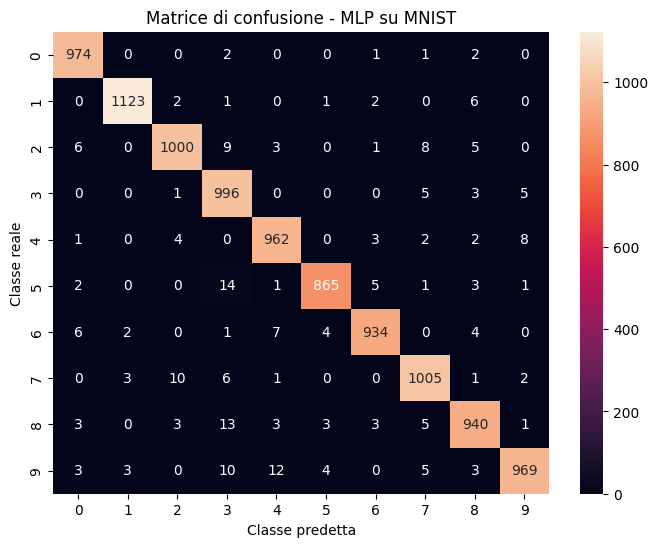

In [153]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Classe predetta")
plt.ylabel("Classe reale")
plt.title("Matrice di confusione - MLP su MNIST")
plt.show()


Brutto schema di colori, si può cambiare con l'argomento `cmap` della `heatmap`:

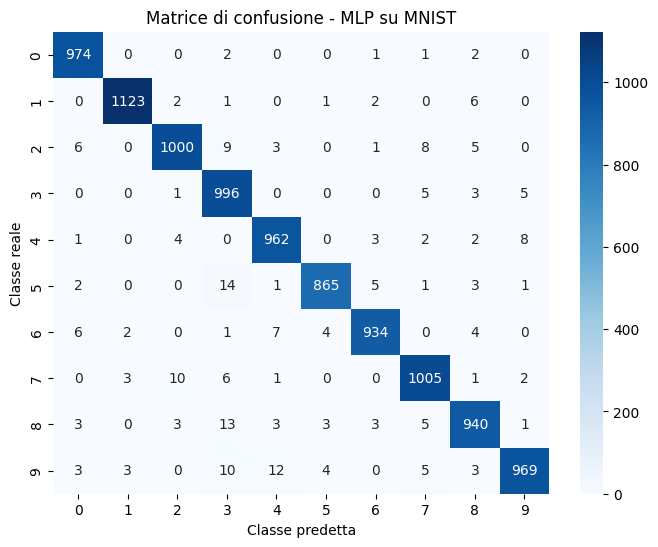

In [162]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # blu classico, molto pulito
plt.xlabel("Classe predetta")
plt.ylabel("Classe reale")
plt.title("Matrice di confusione - MLP su MNIST")
plt.show()


Ed infine un **report dettagliato** con tutte le principali metriche di classificazione, e cioè:
* [precisione e recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [F1-score](https://it.wikipedia.org/wiki/F1_score)
* supporto

In [156]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Nel `classification_report` di scikit-learn, il **support** indica semplicemente **quanti esempi reali di quella classe sono presenti nel dataset di valutazione**.

È quindi la **numerosità della classe nel test set**, non qualcosa che dipende dalle predizioni del modello.

Esempio da questo outputt:
* classe **0 → support = 980**
  → nel test set ci sono 980 immagini che sono davvero “0”
* classe **1 → support = 1135**
  → ci sono 1135 “1” reali
* …
* totale support = **10000**
  → coincide con la dimensione del test set MNIST

**Perché è importante?**<br>
Serve per interpretare precision, recall e F1:
* se il support è basso → la metrica è meno stabile
* se è sbilanciato tra classi → alcune metriche globali possono ingannare

Ad esempio:
* una classe con support 50 e recall 0.90 è meno “robusta” di una con support 1000 e recall 0.90.

**Collegamento alle medie in fondo**
* **macro avg** → media semplice tra classi (ignora il support)
* **weighted avg** → media pesata proprio con il support
  (le classi più frequenti contano di più)

In sintesi:<br>
il support dice **quanto “pesa” ciascuna classe nel dataset su cui si stanno valutando le prestazioni** del modello.

---

👉 Se si desidera che il modello restituisca **probabilità**, è possibile incapsulare il modello allenato e collegarvi la funzione `softmax`:

In [163]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Qui sotto le probabilità di classe per le prime 5 immagini di test:

In [155]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.6138980e-09, 1.1246062e-09, 2.0830580e-06, 3.0445054e-04,
        5.6961502e-14, 1.4047112e-07, 1.9242776e-15, 9.9969304e-01,
        1.4853455e-07, 1.2973787e-07],
       [9.7413988e-09, 2.8174158e-02, 9.7181475e-01, 1.0663289e-05,
        4.9176149e-16, 3.8978027e-07, 6.6114176e-09, 3.5886749e-12,
        1.3799116e-10, 4.8186818e-13],
       [2.4931660e-06, 9.9883085e-01, 3.0253772e-04, 2.9157531e-05,
        7.6448305e-05, 3.0973744e-05, 4.8106675e-05, 4.5218077e-04,
        2.2390389e-04, 3.3550018e-06],
       [9.9986076e-01, 1.0405782e-10, 1.9230736e-06, 2.0273156e-08,
        9.5616270e-10, 2.2716713e-07, 1.8566448e-05, 1.1839525e-04,
        1.4106252e-10, 1.2610290e-07],
       [1.2030223e-05, 6.8813833e-08, 4.0454401e-05, 1.9917081e-06,
        9.8595494e-01, 5.3209251e-06, 6.3541606e-06, 3.2816146e-04,
        7.1209452e-06, 1.3643625e-02]], dtype=float32)>

Come sempre, l'output numpy grezzo può essere **abbellito** con *pandas*, così:

In [164]:
probs = probability_model(x_test[:5]).numpy()

df = pd.DataFrame(probs, columns=range(10))
df.index.name = "immagine"
df.round(3)


0      1      2    3      4    5    6    7    8      9
immagine                                                          
0         0.0  0.000  0.000  0.0  0.000  0.0  0.0  1.0  0.0  0.000
1         0.0  0.028  0.972  0.0  0.000  0.0  0.0  0.0  0.0  0.000
2         0.0  0.999  0.000  0.0  0.000  0.0  0.0  0.0  0.0  0.000
3         1.0  0.000  0.000  0.0  0.000  0.0  0.0  0.0  0.0  0.000
4         0.0  0.000  0.000  0.0  0.986  0.0  0.0  0.0  0.0  0.014

## Conclusione

Complimenti! È stato addestrato un modello di machine learning utilizzando un dataset già pronto tramite l’API [Keras](https://www.tensorflow.org/guide/keras/overview).

Per altri esempi d’uso di Keras, consultare i [tutorial](https://www.tensorflow.org/tutorials/keras/). Per approfondire la costruzione di modelli con Keras, leggere le [guide](https://www.tensorflow.org/guide/keras). Per saperne di più su caricamento e preparazione dei dati, vedere i tutorial su [image data loading](https://www.tensorflow.org/tutorials/load_data/images) o [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).

# Sinossi della regressione lineare
L'altro classico algoritmo di ML/DL, nel quale la risposta è quantitativa.

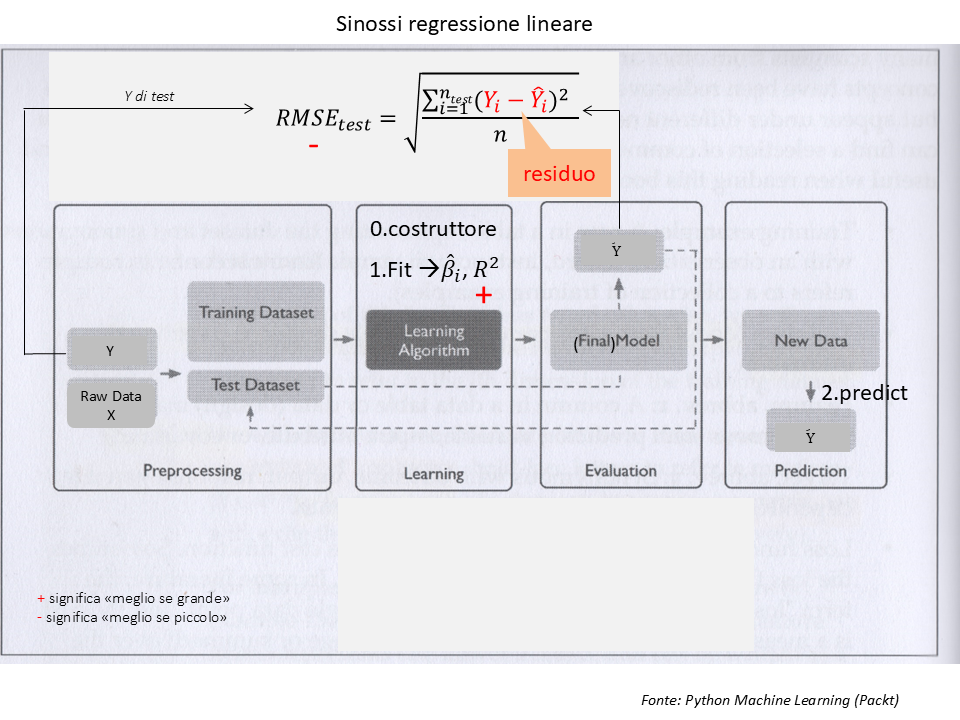

In [ ]:
Image('/content/RMSE.png') if IN_COLAB else display(Image(filename='RMSE.png'))

Per il RMSE vedi la [voce Wikipedia](https://en.wikipedia.org/wiki/Root_mean_square_deviation).<br>
[Qui](https://www.tiktok.com/@brainlink_project/video/7569353458864721174?is_from_webapp=1&sender_device=pc) il link al video di *brainlink* sulla cross-entropia categorica.

## Il trade-off tra bias e varianza

Nel ML tradizionale vale il seguente famoso [trade-off](https://it.wikipedia.org/wiki/Compromesso_bias-varianza).<br>


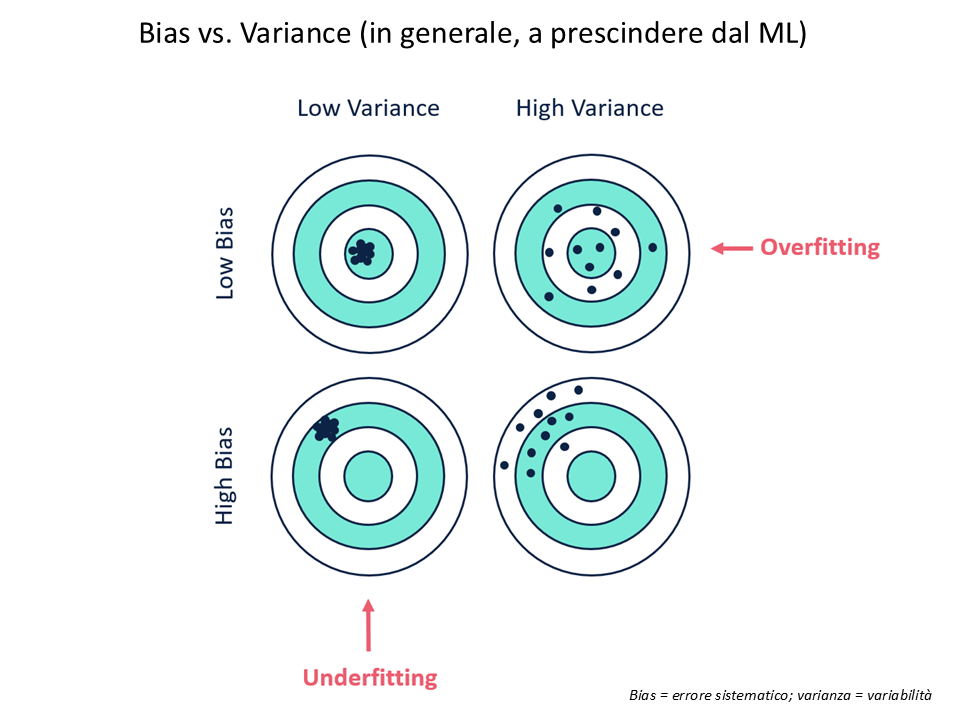

In [ ]:
Image('/content/bias_vs_varianza.png') if IN_COLAB else display(Image(filename='bias_vs_varianza.png'))

Si veda la seguente famosa figura, con l'importanza di valutare le prestazioni sul test dataset, in modo da ridurre il rischio di [overfitting](https://it.wikipedia.org/wiki/Overfitting). [La figura di Wikipedia è fuorviante]

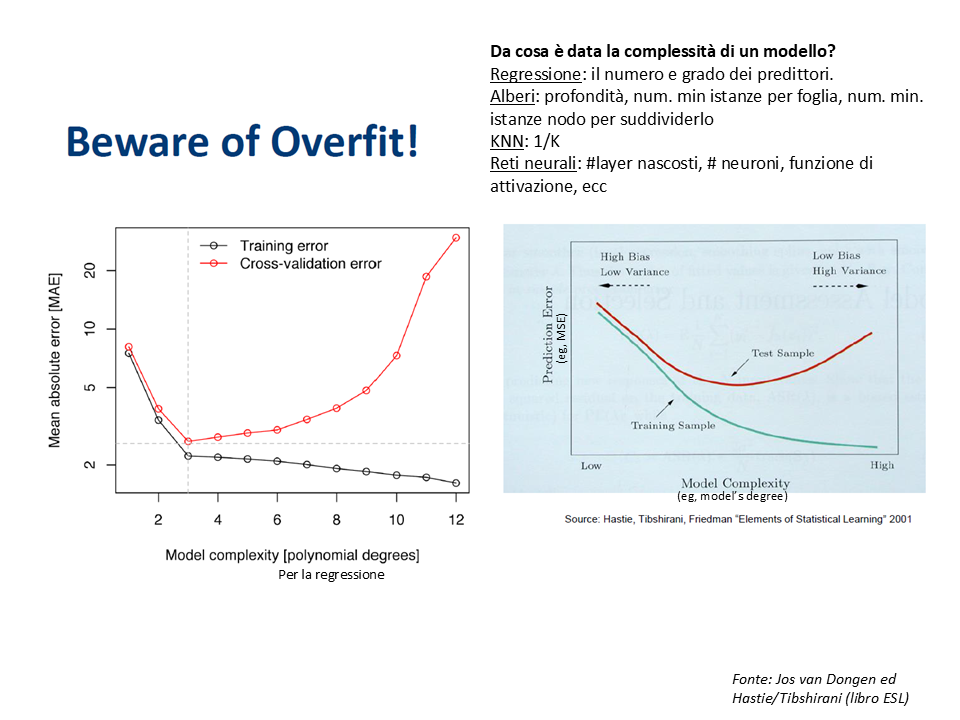

In [165]:
Image('/content/bias_varianza_tradeoff.png') if IN_COLAB else display(Image(filename='bias_varianza_tradeoff.png'))

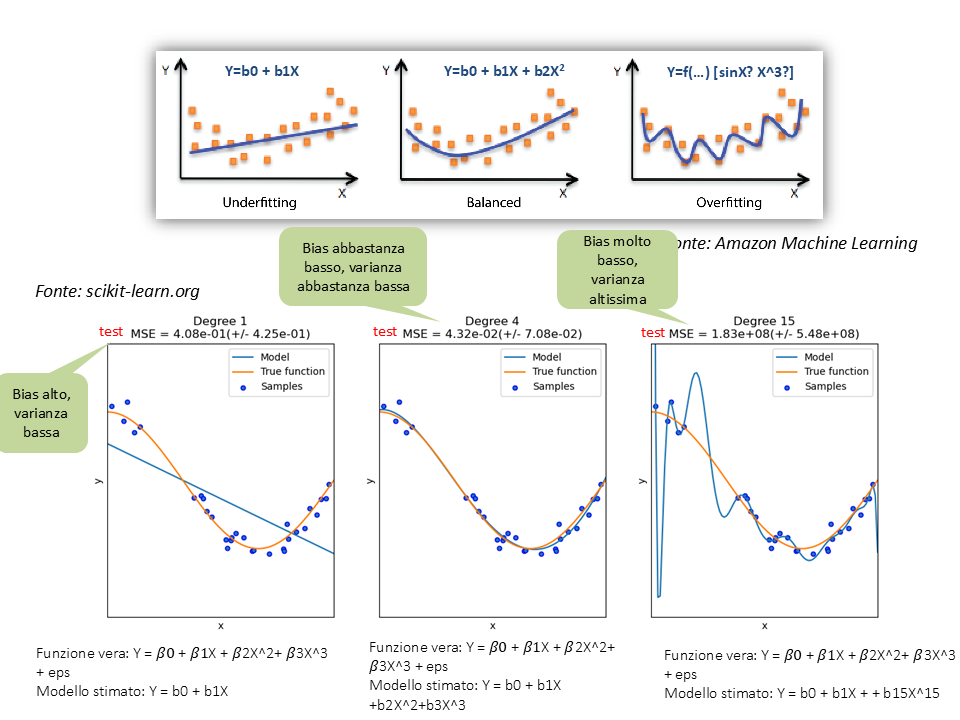

In [166]:
Image('/content/overfit_vs_underfit.png') if IN_COLAB else display(Image(filename='overfit_vs_underfit.png'))

L'aumento della complessità di un modello di ML o di una rete solitamente aumenta la varianza e diminuisce la distorsione (il bias), in forza appunto del trade-off bias-varianza.

Da **studi recenti** sembra che, <u>in alcuni casi e per alcuni tipi di NN</u>, il trade-off bias-varianza non valga più, nel senso che **alcune reti moderne, altamente sovra-parametrizzate, mostrano spesso una varianza ridotta e una migliore generalizzazione all'aumentare delle dimensioni, un fenomeno noto come [doppia discesa](https://en.wikipedia.org/wiki/Double_descent).**




# Una rete TensorFlow per "german credit data"

Sono dati tabellari (strutturati). Adotteremo un approccio completo e “pulito”, con uno stile classico:
* split train/test
* preprocessing separato (fit su train, trasformazione train e test)
* fit keras (binary classification)
* metriche chiare

CSV locale per maggiore stabilità.

📌Mai: fare one-hot su tutto il dataset prima dello split (= *leakage*), vedi più avanti.

C'è anche un'alternativa “moderna” con `tf.data` + normalizzazione dentro TF: è una pipeline più “TensorFlow puro”, si può fare.

👉 Però con tabellari misti (numerici e categorici) scikit-learn + OneHotEncoding restano spesso la via più stabile.

## Import dei package

In [ ]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split                                # split dataset
from sklearn.preprocessing import StandardScaler                                    # classe per standardizzare i dati
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # calcolo delle metriche

## Caricamento dati

In [ ]:
df = pd.read_csv("german_credit_data.csv")  # adatti il nome file

In [ ]:
df.head()

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

E' bene che i nomi delle colonne non contengano spazi:

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')   # sostituisce lo spazio con undescore:
df.head()

**Note importanti sul German Credit (per non farsi male)**

* `Target`: attenzione a come è codificato (spesso good/bad o 1/2). La mappatura deve essere coerente.

* **One-hot e multicollinearità**: nel deep learning non è un problema “statistico” come nella regressione lineare; tuttavia conviene evitare colonne inutili e tenere il preprocessing ordinato (come sopra).

* **Metriche**: su dataset sbilanciati, **AUC e Recall/Precision** sono più informative della sola accuracy. Per semplicità useremo la accuratezza.

* **Threshold prob** = 0.5: è una convenzione; si può tarare (es. massimizzare F1 o un recall minimo). Vedi più avanti.

Vediamo ora se il dataset è abbastanza bilanciato:

In [ ]:
df["risk"].value_counts()


Sì, è bilanciato, stesso ordine di grandezza.<br>
Se non lo fosse stato, ci sarebbero state <u>diverse possibilità</u>:
- sovra-campionamento classe rara
- sotto-campionamento classe frequente
- approccio ibrido (SMOTE)
- pesi delle classi

Vediamo un attimo l'ultima scelta: si può dare più peso agli errori su quella classe durante il training usando `class_weight`. Non cambia l’architettura né il preprocessing: interviene solo sulla funzione di loss.<br>
Vediamo il **codice esemplificativo** (senza eseguirlo).

```python
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])  # 0=good, 1=bad

weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight = {
    0: weights[0],
    1: weights[1]
}

print(class_weight)
```

## Preparazione delle colonne

In [ ]:
predictors = [
    "age",
    "sex",
    "job",
    "housing",
    "saving_accounts",
    "checking_account",
    "credit_amount",
    "duration",
    "purpose"
]
outcome = "risk"

In keras è più comodo usare direttamente `df["risk"]`, oppure l'equivalente `df[outcome]` con `outcome="risk"`, perché restituisce un vettore 1-dimensionale, che è esattamente il formato atteso da una classificazione binaria.<br>
Al contrario:
```python
  outcome = ["risk"]
```
non è consigliabile.

**Reminder**
```python
y1 = df["risk"]     # Series → shape (n,)
y2 = df[["risk"]]   # DataFrame → shape (n, 1)
```

Se `y` è una *Series*:
- match naturale con `binary_crossentropy`
- meno conversioni implicite
- meno warning su *shape*

Cioè, in altri termini: usare `y = df["risk"]` **è comodo** perché produce **un vettore 1D (Series)**, che si **sposa direttamente con `Dense(1, sigmoid)`** (vedi il modello keras più avanti) e `binary_crossentropy`, senza dover gestire `shape (n,1)`.

Se `y` è un *DataFrame*:
- Keras lo converte comunque<br>
ma:
- a volte serve `.values`
- a volte compaiono warning su dimensionalità
- nelle metriche/plot può essere più scomodo

---
**In sintesi: `outcome = "risk"` non è un vincolo matematico**.<br>
È solo:
- coerenza con le API Keras
- semplicità operativa
- meno attrito nel training

Infatti funzionerebbe anche:
```python
y = df[["risk"]].values
```
ma non porta vantaggi in questo caso.



In [ ]:
X = df[predictors]
y = df[outcome].map({"good": 0, "bad": 1}).astype(int) # 1 è l'evento di interesse, qui "bad"
                                                       # Classe positiva: con bad=1, AUC/Recall/Precision si riferiscono al “rischio alto”.

In [ ]:
display(X.head())
y.head()

In [ ]:
display(X.head())

In [ ]:
# (consigliato) uniforma NaN nelle categoriche prima delle dummy
cat_cols = ["sex", "housing", "saving_accounts", "checking_account", "purpose"]
X[cat_cols] = X[cat_cols].fillna("missing")

## Split del dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Dummizzazione (pandas)
Perché serve?<br>
Le reti neurali lavorano su input numerici. Variabili come:
- `Checking_account`
- `Purpose`
- `Housing`
- ecc.

sono categorie nominali: senza trasformazione la rete non può usarle.<br>
👉 **I predittori categorici con le reti neurali vanno dummizzati**, mentre quelli numerici vanno tipicamente **standardizzati**.


**Drop di una dummy?**

Nella regressione lineare classica si usa $(k−1) per evitare multicollinearità.<br>
Nel deep learning non è necessario: la rete non stima coefficienti lineari in forma chiusa e la collinearità non crea instabilità nello stesso senso.<br>
Quindi:
- possiamo lasciare tutte le dummy
- oppure usare `drop="first"` per ridurre la dimensionalità (non per obbligo statistico, solo per compattezza)

**Alternative (quando le categorie sono molte)**:<br>
German Credit ha cardinalità moderate, quindi la one-hot è perfetta.<br>
Altre opzioni (più avanzate):
- embedding layer (approccio tipico DL tabellare)
- target encoding

Ma qui non servono proprio.

In [ ]:
X_train_dum = pd.get_dummies(X_train, drop_first=False)
X_test_dum  = pd.get_dummies(X_test, drop_first=False)

Ora l'importante passo dell'**allineamento** delle colonne del test dataset a quelle del training dataset.

In [ ]:
X_test_dum = X_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)

La riga della cella precedente è fondamentale quando si usa `get_dummies`:
```python
  X_test_dum = X_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)
```

Serve a garantire che train e test abbiano esattamente **le stesse feature nello stesso ordine dopo la dummizzazione**.

Con `pd.get_dummies`, infatti, le colonne create dipendono dalle categorie presenti nel dataset al quale `pd.get_dummies` viene applicato. Train e test non hanno necessariamente le stesse categorie.

Dunque questa riga serve a evitare:
- mismatch di feature
- crash del modello
- encoding incoerente



## Standardizzazione (solo predittori numerici originali)

In [ ]:
num_cols = ["age", "job", "credit_amount", "duration"]

In [ ]:
# Se per caso qualcuno è stato letto come stringa, lo forziamo a numerico
for c in num_cols:
    X_train_dum[c] = pd.to_numeric(X_train_dum[c], errors="coerce")
    X_test_dum[c]  = pd.to_numeric(X_test_dum[c], errors="coerce")

# Eventuali NaN numerici -> imputazione semplice (mediana del train)
for c in num_cols:
    med = X_train_dum[c].median()
    X_train_dum[c] = X_train_dum[c].fillna(med)
    X_test_dum[c]  = X_test_dum[c].fillna(med)


In [ ]:
scaler = StandardScaler()                                               # istanziazione
X_train_dum[num_cols] = scaler.fit_transform(X_train_dum[num_cols])     # fit e transform (sul training dataset)
X_test_dum[num_cols]  = scaler.transform(X_test_dum[num_cols])          # solo transform (sul test dataset)


## FIX dtype
Tutto numerico + float32 per TF.


In [ ]:
X_train_np = X_train_dum.to_numpy(dtype=np.float32)
X_test_np  = X_test_dum.to_numpy(dtype=np.float32)

y_train_np = y_train.to_numpy(dtype=np.int32)
y_test_np  = y_test.to_numpy(dtype=np.int32)

Il codice della cella precedente fa una cosa molto semplice (ma decisiva per TensorFlow): **trasforma i DataFrame/Series di pandas in array NumPy con un tipo numerico “pulito”**.

```python
X_train_np = X_train_dum.to_numpy(dtype=np.float32)
X_test_np  = X_test_dum.to_numpy(dtype=np.float32)

y_train_np = y_train.to_numpy(dtype=np.int32)
y_test_np  = y_test.to_numpy(dtype=np.int32)
```

**1) `X_train_dum.to_numpy(dtype=np.float32)`**

* prende il DataFrame `X_train_dum` (dopo dummizzazione + scaling)
* lo converte in una matrice NumPy 2D
* **forzando il tipo** a `float32`

Perché serve:

* Keras/TensorFlow non accetta colonne con dtype `object`
* `float32` è il formato standard (più compatibile e spesso più veloce di `float64`)

Risultato:

* `X_train_np.shape == (n_train, n_features)`
* tutte le feature sono numeriche float

**2) `y_train.to_numpy(dtype=np.int32)`**

* converte la Series `y_train` in un vettore NumPy
* forzando il tipo a `int32`

Perché:

* le etichette binarie sono 0/1
* `int32` è un tipo intero semplice e sempre accettato

Risultato:

* `y_train_np.shape == (n_train,)`
* valori interi 0/1

**Perché è utile (in pratica)**

Evita esattamente questo errore:

> `ValueError: Invalid dtype: object`

Perché anche **una sola colonna** rimasta `object` in pandas rende `.values` un array “misto” e TensorFlow lo rifiuta. Con `dtype=np.float32` si impone: “o tutto numerico, oppure fallisce prima” (e comunque non arriva a Keras con dtype sbagliato).


In alternativa, si poteva controllare prima della conversione se nel DataFrame erano rimaste colonne con *dtype* `object` (cioè non numeriche), bastava ispezionare i tipi.

## Data leakage?
Per evitare il [**data leakage**](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) è **indispensabile standardizzare i dati DOPO lo split**.

La standardizzazione infatti stima 2 parametri dai dati:
* media
* deviazione standard

Se si standardizza **prima** dello split, queste statistiche vengono calcolate usando **anche il test set**. In quel momento, quindi, il modello “vede” indirettamente informazioni che dovrebbe ignorare fino alla valutazione finale.<br>

👉 È una contaminazione sottile ma reale. Simile a questa è la *feature selection* prima dello split!! (Hastie & Tibshirani).

---

**Cosa succede matematicamente**<br>
Standardizzare significa: $x^{*} = \frac{x - \mu}{\sigma}$.<br>
Se μ e σ sono calcolati su tutto il dataset:<br>
$\mu = \mu_{train+test}, \quad \sigma = \sigma_{train+test}$.

📌 Allora la trasformazione del train **incorpora informazione del test**.
Il modello non è più addestrato in isolamento.

---

**La procedura corretta (sempre)**:<br>
Ordine corretto:
1. split train/test
2. stimare μ e σ **solo sul train**
3. applicare la stessa trasformazione:
   * al train
   * al test

In sklearn:
```python
  preprocess.fit(X_train)      # stima media e std
  X_train_p = preprocess.transform(X_train)
  X_test_p  = preprocess.transform(X_test)
```

---

## Perché è importante davvero
Per evitare il data leakage. Se si standardizza prima:
* metriche test troppo ottimistiche
* rischio di overfitting mascherato
* confronto tra modelli non affidabile

Questo vale per:
* standardizzazione
* PCA
* imputazione
* encoding supervisionati
* feature selection

Tutto ciò che “impara” dai dati va fittato solo sul train.

---

**Intuizione semplice**

Il test set rappresenta il futuro.
Nel mondo reale:

* oggi si allena il modello
* domani arrivano dati nuovi

Non si può conoscere in anticipo:

* media futura
* distribuzione futura

Standardizzare dopo lo split replica esattamente questo scenario operativo.


## Modello keras

Il dataset *German Credit* è piccolo (~1000 righe).<br>
Con una MLP:
- non serve rete grande
- rischio overfitting alto

usare:
- [dropout](https://en.wikipedia.org/wiki/Dilution_(neural_networks))
- [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
-  poche hidden units (principio di parsimonia)

Ma cosa è una [rete neurale MLP](https://it.wikipedia.org/wiki/Percettrone_multistrato)?

Ecco qui sotto un esempio di architettura coerente:

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_np.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

## Criteri
La “pila” (architettura della rete) è stata scelta con criteri molto pragmatici, legati a tre fattori specifici del problema:

* dataset piccolo (~1000 osservazioni)
* dati tabellari
* classificazione binaria

Non è una struttura arbitraria: è una configurazione volutamente sobria per evitare overfitting.

---

**1) Numero di layer**

```text
Input → Dense(32) → Dense(16) → Output(1)
```

Criterio:
* sui tabellari raramente servono reti profonde
* 1–2 hidden layer sono lo standard
* più layer:
  * aumentano varianza
  * non portano benefici su dataset piccoli

Storicamente (prima del DL “deep” sui tabellari):
* MLP shallow funzionavano meglio delle architetture profonde.

---

**2) Numero di neuroni**

```text
32 → 16
```

Criterio empirico classico:
* dimensione comparabile al numero di feature dopo dummizzazione
* progressiva compressione dell’informazione
* evitare modelli troppo capienti

Regola pratica:
$$\text{neuroni primo layer} \approx 1\text{–}3 \times \text{numero feature}$$
poi si riduce:
$$32 \to 16 \to 1$$

---

**3) Attivazioni**

```python
relu
```

Perché:
* stabile
* veloce
* evita saturazioni tipiche di sigmoid/tanh negli hidden layer

È lo standard per MLP tabellari.

Output:
```python
sigmoid
```

Perché:
$$P(Y=1|X)$$

serve probabilità per classificazione binaria.

Vedi dopo per **definizione del sigmoide** e delle **funzioni di attivazione più popolari**.
---

**4) Loss**

```python
binary_crossentropy
```

Motivo teorico:
* deriva dalla massima verosimiglianza
* coincide con logistic regression loss

È la scelta naturale per:
$$
y \in {0,1}$$

---

**5) Dropout**

```python
Dropout(0.2)
```

Criterio:
* dataset piccolo → alto rischio overfitting
* dropout introduce regolarizzazione
* 0.2 è valore conservativo (non aggressivo)

---

**6) Ottimizzatore**

```python
Adam(lr=1e-3)
```

Scelta standard perché:
* robusto
* richiede poca calibrazione
* funziona bene su dati tabellari

Non serve SGD “puro” su problemi così piccoli.

---

**7) Early stopping**

```python
monitor = val_auc
```

Perché:
* accuracy può essere fuorviante con classi sbilanciate
* AUC è più stabile
* ferma il training prima dell’overfitting

---

**8) Perché non una rete più grande**

Con German Credit, se si usa:

```text
128 → 64 → 32 → 16
```

succede tipicamente:
* training accuracy altissima
* test AUC peggiora
* modello instabile

Segnale classico di overfitting.

---

**9) Intuizione generale**

Questa architettura segue una filosofia precisa:

> sui dati tabellari piccoli, la potenza del modello sta più nel preprocessing che nella profondità della rete.

In effetti:
* dummizzazione
* scaling
* gestione class imbalance

incidono più dell’architettura.

---

**10) Come si configurerebbe “seriamente”**

Una configurazione rigorosa richiederebbe:
* grid search su:
  * neuroni
  * dropout
  * learning rate
* cross-validation

E spesso emerge qualcosa del tipo:

```text
Dense(16) → Dense(8) → Output
```

cioè ancora più semplice.

---

**Sintesi**

La pila è stata definita con criteri:
* parsimonia
* stabilità
* prevenzione overfitting
* coerenza con letteratura MLP su dati tabellari

📌 Non è una “architettura deep”: è una **MLP classica**, che su German Credit è esattamente ciò che funziona meglio.


# Funzioni di attivazione

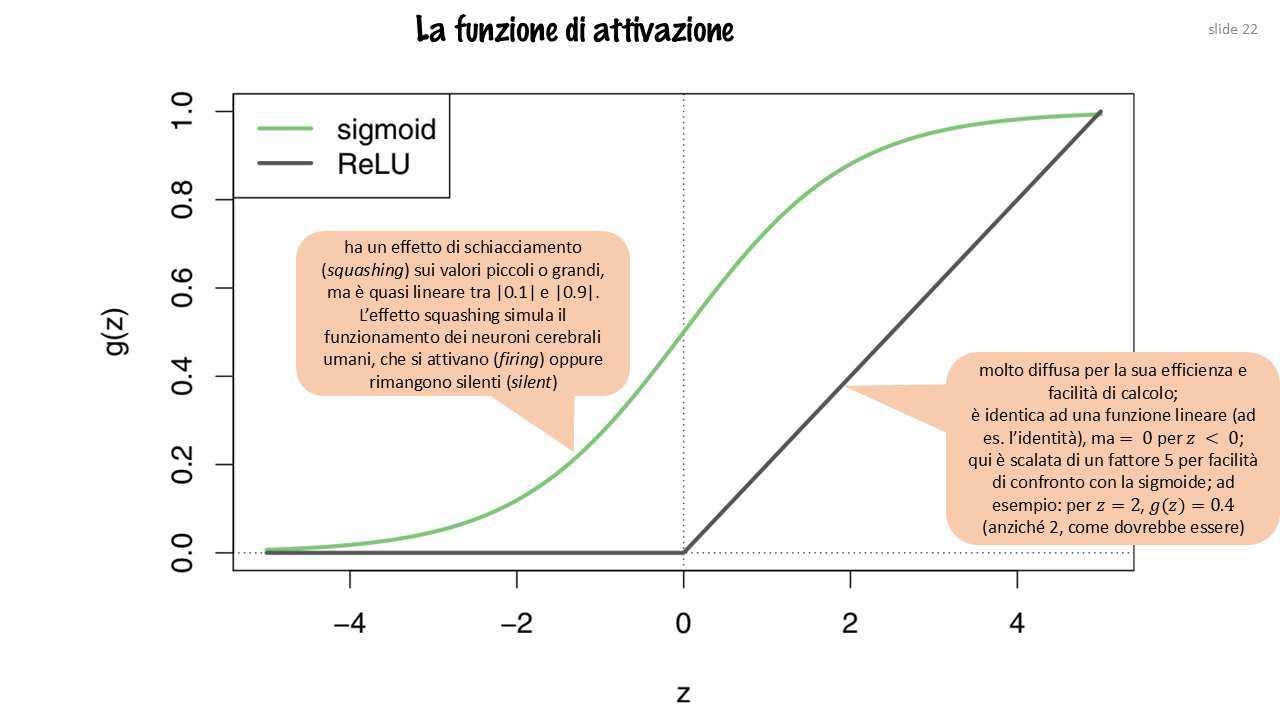

In [ ]:
Image('/content/sigmoide.png', width=1000) if IN_COLAB else display(Image(filename='sigmoide.png'))

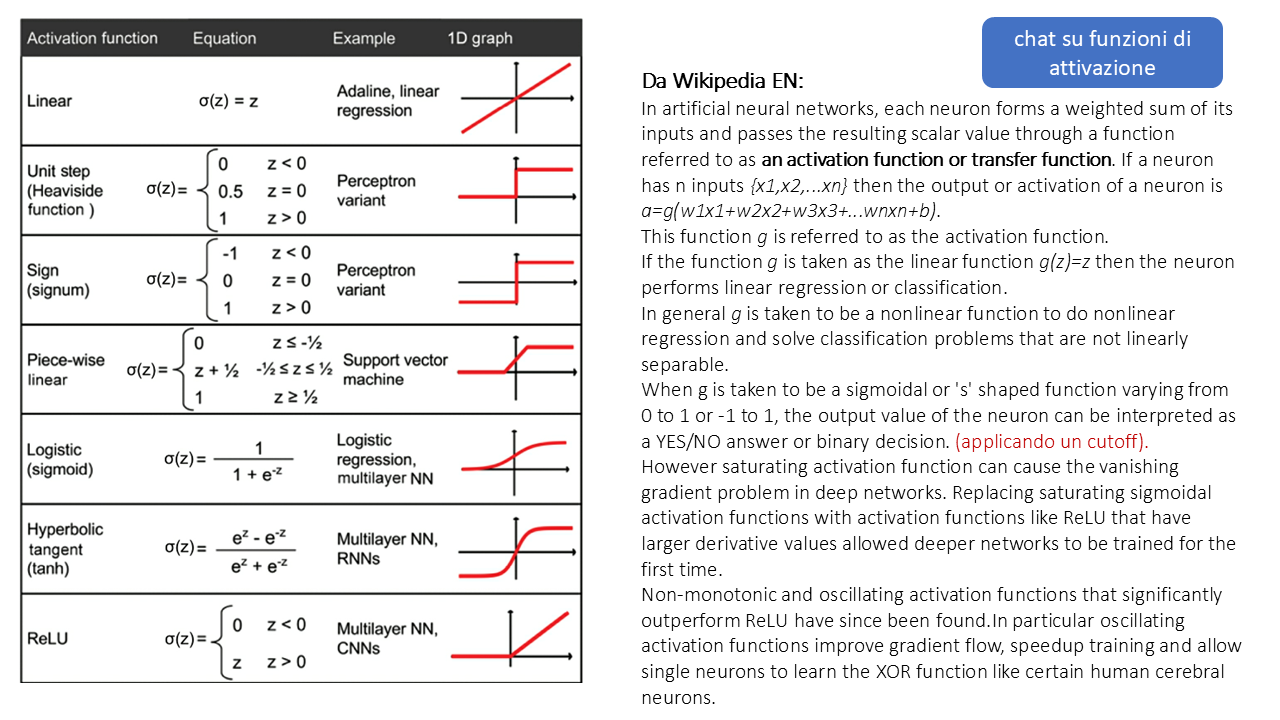

In [ ]:
Image('/content/funzioni_attivazione.png', width=1000) if IN_COLAB else display(Image(filename='funzioni_attivazione.png'))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")]
)

Un modello Keras si “compila” perché, prima dell’addestramento, deve essere definito **come** imparare dai dati.

La rete, così com’è dopo aver definito i layer, è solo una struttura matematica; non sa ancora:
* quale errore minimizzare
* come aggiornare i pesi
* quali metriche monitorare

La `compile()` serve a specificare questi elementi.

---

**Cosa succede quando si chiama `model.compile()`**

Si fissano tre componenti fondamentali.

**1) Funzione di loss**

Definisce cosa significa “sbagliare”.<br>
Esempio:

```python
  loss = "binary_crossentropy"
```

Traduce:
$$\text{errore} = f(y_{vero}, y_{predetto})$$

È l’equivalente della funzione obiettivo nella regressione classica.

---

**2) Ottimizzatore**

Definisce **come** aggiornare i pesi per ridurre la loss.<br>
Esempio:

```python
  optimizer = Adam
```

Cioè:
* gradient descent adattivo
* passo automatico sui parametri

Senza ottimizzatore la rete non può imparare.

---

**3) Metriche**

Definiscono cosa monitorare durante training e validazione.<br>
Esempio:

```python
  metrics = ["accuracy"]
```

Non influenzano l’apprendimento, ma permettono di valutare il modello.

---

**Analogia classica**

Nella regressione lineare:
* si definisce la funzione dei minimi quadrati
* si sceglie l’algoritmo di stima
* si valutano R², MSE, ecc.

In Keras:
* `loss` = funzione dei minimi quadrati/log-likelihood
* `optimizer` = algoritmo numerico di stima
* `metrics` = indicatori di performance

---

**Perché è un passaggio separato**

Storicamente (e concettualmente):
* definizione del modello → struttura matematica
* compilazione → definizione del problema di ottimizzazione
* fit → stima dei parametri

Separare i passaggi permette di:
* cambiare loss senza rifare la rete
* usare ottimizzatori diversi
* riutilizzare la stessa architettura per regressione o classificazione

---

**In sintesi**

`model.compile()` trasforma una rete da<br>
→ oggetto matematico statico<br>
a<br>
→ modello addestrabile con una regola precisa di apprendimento.


## Fit (early stopping su `val_acc`):

In [ ]:
early = tf.keras.callbacks.EarlyStopping(
    monitor="val_acc", mode="max", patience=10, restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train_np,
    y_train_np,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early],
    verbose=1
)


## Valutazione accuratezza

In [ ]:
loss, acc = model.evaluate(X_test_np, y_test_np, verbose=0)
print({"loss": float(loss), "acc": float(acc)})

In [ ]:
y_prob = model.predict(X_test_np, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

La soglia **0.5** serve a trasformare la probabilità prodotta dalla rete in una decisione di classe.

Il modello con `sigmoid` in uscita restituisce:
$p = P(\text{bad} \mid X)$, cioè un numero tra 0 e 1.

Per ottenere la previsione finale bisogna decidere quando dire “bad” e quando “good”. La regola standard è:

```python
y_pred = (y_prob >= 0.5).astype(int)
```

Quindi:

* se ( p \ge 0.5 ) → classe **bad**
* se ( p < 0.5 ) → classe **good**

---

Perché proprio 0.5?<br>
Perché è il punto neutro:
* sopra → più probabile “bad”
* sotto → più probabile “good”

È l’equivalente della decision rule nella regressione logistica classica.

---

Non è obbligatoria!
La soglia si può cambiare se l’obiettivo non è “simmetrico”.<br>
Esempi tipici nel credito:
* meglio ridurre i falsi negativi (non concedere credito a chi è rischioso)
* si usa una soglia più bassa:

```text
0.3 oppure 0.4
```
Così il modello classifica più facilmente come “bad”.

Oppure:
* se si vuole concedere più credito possibile:
* si alza la soglia (0.6–0.7)

---

Punto chiave

Il modello produce **probabilità**.<br>
La soglia serve a trasformarle in **decisioni operative**.

Accuratezza, confusion matrix ecc. dipendono direttamente da questa scelta.


In [ ]:
print("Accuracy (sklearn):", accuracy_score(y_test_np, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test_np, y_pred))
print(classification_report(y_test_np, y_pred, digits=3))